# Read in data

In [1]:
import pandas as pd
import json
import numpy as np
import string
import functools as ft
import math

# https://stackoverflow.com/questions/74918614/error-importing-seaborn-module-attributeerror
def dummy_npwarn_decorator_factory():
    def npwarn_decorator(x):
        return x
    return npwarn_decorator
np._no_nep50_warning = getattr(np, '_no_nep50_warning', dummy_npwarn_decorator_factory)

import pingouin as pg


import seaborn as sns
import matplotlib.pyplot as plt 

## Read in country sheet

In [2]:
def read_in_country_sheet(filename):
    
    # nrows = 194 because there are more rows in the file (to compute totals) which we want to ignore
    df = pd.read_excel(filename, header=[1,2], nrows=194)
    headers = df.columns
    # Drop the last column which just lists yes and no as the possible entries for certain columns
    df = df.drop(headers[-1], axis=1)
    return df

df = read_in_country_sheet('Landen mapping sheet version Sep 2024.xlsx')
df

Landencode               Land  Land (voor kaart)  \
    Unnamed: 0_level_1 Unnamed: 1_level_1 Unnamed: 2_level_1   
0                  AFG       Afghanistan         Afghanistan   
1                  ALB            Albania            Albania   
2                  DZA            Algeria            Algeria   
3                  AND            Andorra            Andorra   
4                  AGO             Angola             Angola   
..                 ...                ...                ...   
189                VEN          Venezuela          Venezuela   
190                VNM            Vietnam            Vietnam   
191                YEM              Yemen              Yemen   
192                ZMB             Zambia             Zambia   
193                ZWE           Zimbabwe           Zimbabwe   

       Land korte naam          Bevolking                BNP  \
    Unnamed: 3_level_1 Unnamed: 4_level_1 Unnamed: 5_level_1   
0          Afghanistan           42239854                NaN   
1              Albania            2832439       1.891638e+10   
2              Algeria           45606480       1.949984e+11   
3              Andorra              80088       3.352031e+09   
4               Angola           36684202       1.067828e+11   
..                 ...                ...                ...   
189          Venezuela           28838499                NaN   
190            Vietnam           98858950       4.088024e+11   
191              Yemen           34449825                NaN   
192             Zambia           20569737       2.916378e+10   
193           Zimbabwe           16665409       2.736663e+10   

         Jaar van data Attendance NSA meetings               ...  \
    Unnamed: 6_level_1              Copenhagen Jeddah Malta  ...   
0                  NaN                     NaN    NaN    no  ...   
1               2022.0                     NaN    NaN   yes  ...   
2               2022.0                     NaN    NaN    no  ...   
3               2022.0                     NaN    NaN    no  ...   
4               2022.0                     NaN    NaN    no  ...   
..                 ...                     ...    ...   ...  ...   
189                NaN                     NaN    NaN    no  ...   
190             2022.0                     NaN    NaN    no  ...   
191                NaN                     NaN    NaN    no  ...   
192             2022.0                     NaN    yes    no  ...   
193             2022.0                     NaN    NaN    no  ...   

    AVVN Resolutie 11 juli 2024                                      \
                        Against Abstain Absent Summary July 11 2024   
0                           NaN     NaN    yes               Absent   
1                           NaN     NaN    NaN             In favor   
2                           NaN     yes    NaN              Abstain   
3                           NaN     NaN    NaN             In favor   
4                           NaN     yes    NaN              Abstain   
..                          ...     ...    ...                  ...   
189                         NaN     NaN    yes               Absent   
190                         NaN     yes    NaN              Abstain   
191                         NaN     yes    NaN              Abstain   
192                         NaN     NaN    NaN             In favor   
193                         NaN     yes    NaN              Abstain   

    Lid internationale organisaties                          
                               NAVO BRICS  G7 ASEAN  EU SCO  
0                                no    no  no    no  no  no  
1                               yes    no  no    no  no  no  
2                                no    no  no    no  no  no  
3                                no    no  no    no  no  no  
4                                no    no  no    no  no  no  
..                              ...   ...  ..   ...  ..  ..  
189                              no    no

In [3]:
def dump_json(dictionary, filename):
    with open(filename, 'w') as f:
        json.dump(dictionary, f, indent=4)

def create_country_dict(country_df, filename=None):
    countries = country_df[['Landencode', 'Land', 'Land (voor kaart)']]
    countries.columns = countries.columns.map(lambda x : x[0])
    print(countries.columns)
    countries = countries.set_index('Landencode')
    print(countries)
    country_dict = countries.to_dict(orient='index')#, index=False)
    print(country_dict)
    country_dict_new = {}
    for country in country_dict: 
        land = country_dict[country]['Land']
        land_kaart = country_dict[country]['Land (voor kaart)']
        country_dict_new[country] = [land]
        if land != land_kaart:
            country_dict_new[country].append(land_kaart)
    if filename is not None:
        dump_json(country_dict_new, filename)
    return country_dict_new

create_country_dict(df, filename="country_xlsx.json")

Index(['Landencode', 'Land', 'Land (voor kaart)'], dtype='object')
                    Land Land (voor kaart)
Landencode                                
AFG         Afghanistan        Afghanistan
ALB              Albania           Albania
DZA              Algeria           Algeria
AND              Andorra           Andorra
AGO               Angola            Angola
...                  ...               ...
VEN            Venezuela         Venezuela
VNM              Vietnam           Vietnam
YEM                Yemen             Yemen
ZMB               Zambia            Zambia
ZWE             Zimbabwe          Zimbabwe

[194 rows x 2 columns]
{'AFG': {'Land': 'Afghanistan ', 'Land (voor kaart)': 'Afghanistan'}, 'ALB': {'Land': 'Albania', 'Land (voor kaart)': 'Albania'}, 'DZA': {'Land': 'Algeria', 'Land (voor kaart)': 'Algeria'}, 'AND': {'Land': 'Andorra', 'Land (voor kaart)': 'Andorra'}, 'AGO': {'Land': 'Angola', 'Land (voor kaart)': 'Angola'}, 'ATG': {'Land': 'Antigua and Barbuda', 'La

{'AFG': ['Afghanistan ', 'Afghanistan'],
 'ALB': ['Albania'],
 'DZA': ['Algeria'],
 'AND': ['Andorra'],
 'AGO': ['Angola'],
 'ATG': ['Antigua and Barbuda'],
 'ARG': ['Argentina'],
 'ARM': ['Armenia'],
 'AUS': ['Australia'],
 'AUT': ['Austria'],
 'AZE': ['Azerbaijan'],
 'BHS': ['Bahamas'],
 'BHR': ['Bahrain'],
 'BGD': ['Bangladesh'],
 'BRB': ['Barbados'],
 'BLR': ['Belarus'],
 'BEL': ['Belgium'],
 'BLZ': ['Belize'],
 'BEN': ['Benin'],
 'BTN': ['Bhutan'],
 'BOL': ['Bolivia'],
 'BIH': ['Bosnia and Herzegovina'],
 'BWA': ['Botswana'],
 'BRA': ['Brazil'],
 'BRN': ['Brunei'],
 'BGR': ['Bulgaria'],
 'BFA': ['Burkina Faso'],
 'BDI': ['Burundi'],
 'CPV': ['Cabo Verde'],
 'KHM': ['Cambodia'],
 'CMR': ['Cameroon'],
 'CAN': ['Canada'],
 'CAF': ['Central African Republic'],
 'TCD': ['Chad'],
 'CHL': ['Chile'],
 'CHN': ['China'],
 'COL': ['Colombia'],
 'COM': ['Comoros'],
 'COG': ['Congo (Congo-Brazzaville)', 'Congo-Brazzaville'],
 'CRI': ['Costa Rica'],
 'CIV': ["Côte d'Ivoire"],
 'HRV': ['Croatia'

## Find countries

In [4]:
def read_json(filename):
    with open(filename, 'r') as f:
        dictionary = json.load(f)
    return dictionary

def reverse_dict(dictionary):
    reverse_dict = {}
    for key in dictionary:
        for name in dictionary[key]:
            reverse_dict[name] = key
    return reverse_dict

countries_per_code = read_json("country.json")
code_for_countries = reverse_dict(countries_per_code)
code_for_countries

{'Afghanistan ': 'AFG',
 'Afghanistan': 'AFG',
 'Albania': 'ALB',
 'Algeria': 'DZA',
 'Andorra': 'AND',
 'Angola': 'AGO',
 'Antigua and Barbuda': 'ATG',
 'Antigua And Barbuda': 'ATG',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'Australia': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Azerbaïjan': 'AZE',
 'Bahamas': 'BHS',
 'Bahrain': 'BHR',
 'Bangladesh': 'BGD',
 'Barbados': 'BRB',
 'Belarus': 'BLR',
 'Belgium': 'BEL',
 'Belize': 'BLZ',
 'Benin': 'BEN',
 'Bhutan': 'BTN',
 'Bolivia': 'BOL',
 'Bolivia (plurinational State Of)': 'BOL',
 'Bosnia and Herzegovina': 'BIH',
 'Bosnia-Herzegovina': 'BIH',
 'Bosnia And Herzegovina': 'BIH',
 'Botswana': 'BWA',
 'Brazil': 'BRA',
 'Brunei': 'BRN',
 'Brunei Darussalam': 'BRN',
 'Bulgaria': 'BGR',
 'Burkina Faso': 'BFA',
 'Burundi': 'BDI',
 'Cabo Verde': 'CPV',
 'Cape Verde': 'CPV',
 'Cambodia': 'KHM',
 'Cameroon': 'CMR',
 'Canada': 'CAN',
 'Central African Republic': 'CAF',
 'Chad': 'TCD',
 'Chile': 'CHL',
 'China': 'CHN',
 'Colombia': 'COL',
 'Co

In [5]:
def find_country_code(name, country_dict):
    if name in country_dict:
        return country_dict[name]
    else: 
        print(f"Error! Name {name} not in country_dict")
        return name
        


## Create database dataframe


In [6]:
def create_database_df(countries_per_code):
    df = pd.DataFrame()
    df['country_code'] = countries_per_code.keys()
    return df.set_index('country_code')

database = create_database_df(countries_per_code)

In [7]:
countries_to_exclude = ['AFE', #Africa Eastern and Southern
                       'AFW', #Africa Western and Central
                        'ARB', #Arab world
                       'CEB', #Central Europe and the Baltics
                       'CSS', #Caribbean small states
                       'EAP', #East Asia & Pacific (excluding high income)
                       'EAR', #Early-demographic dividend
                       'EAS', #East Asia & Pacific
                       'ECA', #Europe & Central Asia (excluding high income)
                       'ECS', #Europe & Central Asia
                        'EMU', #Euro area
                       'EUU', #European Union
                       'FCS', #Fragile and conflict affected situations
                        'HIC', #High income
                        'HPC', #Heavily indebted poor countries (HIPC)
                        'IBD', #IBRD only
                        'IBT', #IDA & IBRD total
                        'IDA', #IDA total
                        'IDB', #IDA blend
                        'IDX', #IDA only
                        'INX', #Not classified
                        'LAC', #Latin America & Caribbean (excluding high income)
                        'LCN', #Latin America & Caribbean
                        'LDC', #Least developed countries: UN classification
                        'LIC', #Low income
                        'LMC', #Lower middle income
                        'LMY', #Low & middle income
                        'LTE', #Late-demographic dividend
                        'MEA', #Middle East & North Africa
                        'MIC', #Middle income
                        'MNA', #Middle East & North Africa (excluding high income)
                        'NAC', #North America
                        'OED', #OECD members
                        'OSS', #Other small states
                        'PRE', #Pre-demographic dividend
                        'PST', #Post-demographic dividend
                        'SAS', #South Asia
                        'SSA', #Sub-Saharan Africa (excluding high income)
                        'SSF', #Sub-Saharan Africa
                        'SST', #Small states
                        'TEA', #East Asia & Pacific (IDA & IBRD countries)
                        'TEC', #Europe & Central Asia (IDA & IBRD countries)
                        'TLA', #Latin America & the Caribbean (IDA & IBRD countries)
                        'TMN', #Middle East & North Africa (IDA & IBRD countries)
                        'TSA', #South Asia (IDA & IBRD)
                        'TSS', #Sub-Saharan Africa (IDA & IBRD countries)
                        'UMC', #Upper middle income
                        'WLD', #World
                       ]

## Fill database

In [8]:
def read_and_append_to_database(filename, read_func, database, code_for_countries):
    new_columns = read_func(filename, database, code_for_countries)
    return join_dataframes(database, new_columns)


In [9]:
def join_dataframes(database, new_df):
    '''
    
    new_df needs to have just the columns that need to be appended (all other columns should
    be dropped) and as indices have the country codes (so not the country names!)
    '''
    #return database.join(new_df, on="country_code")
    return pd.concat([database, new_df], axis=1)

### Population size

In [10]:
def read_population_size(filename, database, code_for_countries):
    #we skip the first three rows because they contain metadata, which we are not interested in right now
    df = pd.read_excel(filename, header=0, skiprows=[0,1,2])
    
    # Rename the columns so that they fit with the rest of the database
    df['country_code'] = df['Country Code']
    df['Population size 2021'] = df['2021']
    df['Population size 2023'] = df['2023']
    
    # Select only the 2021 count, cause we do not use the rest (for now, at least)
    df = df[['country_code', 'Population size 2021', 'Population size 2023']]
    df = df.dropna(axis=0)
    
    df = df.set_index('country_code')
    
    for country in countries_to_exclude:
        if country in df.index:            
            df = df.drop(index=country)
    
    print(df)
    return df

filename = "WorldbankPopulation.xls"
#armed_personnel = read_personnel_armed_forces(filename, database, code_for_countries)
#join_dataframes(database, armed_personnel)
database = read_and_append_to_database(filename, read_population_size, database, code_for_countries)
database

              Population size 2021  Population size 2023
country_code                                            
ABW                       106537.0              106277.0
AFG                     40099462.0            42239854.0
AGO                     34503774.0            36684202.0
ALB                      2811666.0             2745972.0
AND                        79034.0               80088.0
...                            ...                   ...
XKX                      1786038.0             1756374.0
YEM                     32981641.0            34449825.0
ZAF                     59392255.0            60414495.0
ZMB                     19473125.0            20569737.0
ZWE                     15993524.0            16665409.0

[218 rows x 2 columns]


,Population size 2021,Population size 2023
country_code,,
AFG,40099462.0,42239854.0
ALB,2811666.0,2745972.0
DZA,44177969.0,45606480.0
AND,79034.0,80088.0
AGO,34503774.0,36684202.0
...,...,...
SXM,40708.0,41163.0
TCA,45114.0,46062.0
VGB,31122.0,31538.0


### GDP

In [11]:
def read_GDP(filename, database, code_for_countries):
    #we skip the first three rows because they contain metadata, which we are not interested in right now
    df = pd.read_excel(filename, header=0, skiprows=[0,1,2])
    
    # Rename the columns so that they fit with the rest of the database
    df['country_code'] = df['Country Code']
    df['GDP 2021'] = df['2021']
    df['GDP 2023'] = df['2023']
    
    # Select only the 2021 count, cause we do not use the rest (for now, at least)
    df = df[['country_code', 'GDP 2021', 'GDP 2023']]
    df = df.dropna(axis=0)
    
    df = df.set_index('country_code')
    
    for country in countries_to_exclude:
        if country in df.index:            
            df = df.drop(index=country)
    
    print(df)
    return df

filename = "WorldbankGDP.xls"
database = read_and_append_to_database(filename, read_GDP, database, code_for_countries)
database

                  GDP 2021      GDP 2023
country_code                            
ABW           2.929447e+09  3.648573e+09
AFG           1.426000e+10  1.723305e+10
AGO           6.650513e+10  8.482465e+10
ALB           1.803201e+10  2.354718e+10
AND           3.324648e+09  3.785067e+09
...                    ...           ...
WSM           8.439236e+08  9.381894e+08
XKX           9.413404e+09  1.046822e+10
ZAF           4.208869e+11  3.806993e+11
ZMB           2.209642e+10  2.757796e+10
ZWE           2.724052e+10  3.523137e+10

[195 rows x 2 columns]


,Population size 2021,Population size 2023,GDP 2021,GDP 2023
country_code,,,,
AFG,40099462.0,42239854.0,1.426000e+10,1.723305e+10
ALB,2811666.0,2745972.0,1.803201e+10,2.354718e+10
DZA,44177969.0,45606480.0,1.862312e+11,2.476262e+11
AND,79034.0,80088.0,3.324648e+09,3.785067e+09
AGO,34503774.0,36684202.0,6.650513e+10,8.482465e+10
...,...,...,...,...
SXM,40708.0,41163.0,1.353071e+09,1.627777e+09
TCA,45114.0,46062.0,1.045782e+09,1.402054e+09
VGB,31122.0,31538.0,NaN,NaN


### Fragile state index

In [12]:


def read_fragile_state_index(filename, database, code_for_countries):
    df = pd.read_excel(filename, header=[0,1])
    
    # Transform the multiindex into a single index and add "FSI" to make it clear it is
    # about the Fragile State Index
    df.columns = df.columns.map(lambda x : "FSI " + x[0] + " (" + x[1] + ")")
    
    # Drop the two ranking columns, because we do not use them
    df = df.drop(df.columns[1:3], axis=1)
    #print(df)
    df['country_code'] = df.apply(lambda x: find_country_code(x['FSI Unnamed: 0_level_0 (Country)'], code_for_countries), axis=1)
    df = df.drop('FSI Unnamed: 0_level_0 (Country)', axis=1)
    print(df)
    return df.set_index('country_code')

filename = "FragileStateIndex2021.xlsx"
database = read_and_append_to_database(filename, read_fragile_state_index, database, code_for_countries)
database

     FSI Total (2021)  FSI C1: Security Apparatus (2021)  \
0               111.7                                9.4   
1               110.9                                9.3   
2               110.7                                9.6   
3               109.4                                9.7   
4               108.4                                8.6   
..                ...                                ...   
174              18.8                                1.7   
175              18.4                                1.4   
176              18.0                                0.7   
177              16.6                                1.8   
178              16.2                                2.5   

     FSI C2: Factionalized Elites (2021)  FSI C3: Group Grievance (2021)  \
0                                   10.0                             9.4   
1                                   10.0                             8.3   
2                                    9.9           

,Population size 2021,Population size 2023,GDP 2021,GDP 2023,FSI Total (2021),FSI C1: Security Apparatus (2021),FSI C2: Factionalized Elites (2021),FSI C3: Group Grievance (2021),FSI E1: Economy (2021),FSI E2: Economic Inequality (2021),FSI E3: Human Flight and Brain Drain (2021),FSI P1: State Legitimacy (2021),FSI P2: Public Services (2021),FSI P3: Human Rights (2021),FSI S1: Demographic Pressures (2021),FSI S2: Refugees and IDPs (2021),FSI X1: External Intervention (2021)
country_code,,,,,,,,,,,,,,,,,
AFG,40099462.0,42239854.0,1.426000e+10,1.723305e+10,102.1,10.0,8.6,7.2,9.2,8.1,7.0,8.7,9.8,7.4,9.0,8.8,8.3
ALB,2811666.0,2745972.0,1.803201e+10,2.354718e+10,59.0,4.8,6.2,4.1,6.4,2.9,8.3,5.5,4.4,3.6,4.1,2.6,6.1
DZA,44177969.0,45606480.0,1.862312e+11,2.476262e+11,73.6,6.0,7.5,7.2,6.8,5.6,5.5,7.8,5.6,6.3,4.8,6.8,3.7
AND,79034.0,80088.0,3.324648e+09,3.785067e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGO,34503774.0,36684202.0,6.650513e+10,8.482465e+10,89.0,7.2,7.2,8.1,8.4,8.9,6.0,8.2,9.3,6.2,9.0,5.9,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SXM,40708.0,41163.0,1.353071e+09,1.627777e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCA,45114.0,46062.0,1.045782e+09,1.402054e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VGB,31122.0,31538.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#database[['FSI E1: Economy (2021)', 'FSI E2: Economic Inequality (2021)', 'FSI E3: Human Flight and Brain Drain (2021)']]
# Economic factors

pg.cronbach_alpha(data=database[['FSI E1: Economy (2021)', 'FSI E2: Economic Inequality (2021)', 'FSI E3: Human Flight and Brain Drain (2021)']])



(0.878088556148679, array([0.847, 0.904]))

In [14]:
# Political factors
pg.cronbach_alpha(data=database[['FSI P1: State Legitimacy (2021)', 'FSI P2: Public Services (2021)', 'FSI P3: Human Rights (2021)']])


(0.8986915133474372, array([0.873, 0.92 ]))

In [15]:
# All factors
#print(database.columns[2:14])

pg.cronbach_alpha(data=database[database.columns[2:14]])


(0.5431125290674397, array([0.449, 0.627]))

In [16]:
# Ethnic grievances
pg.cronbach_alpha(data=database[['FSI C2: Factionalized Elites (2021)', 'FSI C3: Group Grievance (2021)']])


(0.820490611907067, array([0.766, 0.862]))

### Democracy Index

In [17]:
def read_democracy_index(filename, database, code_for_countries):
    df = pd.read_excel(filename, header=0)
    print(df)
    print(df.columns)
    
    # The [1:-1] is because all countries have a space before and after their name, so we strip that away
    df['country_code'] = df.apply(lambda x: find_country_code(x['Country '][1:-1], code_for_countries), axis=1)
    
    # Invert the Democracy Index so that the sign matches the FSI
    df['Democracy Index'] = 10 - df['Overall score ']
    df = df[['country_code', 'Democracy Index']]
    return df.set_index('country_code')

    '''
    
    # Drop the two ranking columns, because we do not use them
    df = df.drop(df.columns[1:3], axis=1)
    #print(df)
    df['country_code'] = df.apply(lambda x: find_country_code(x['FSI Unnamed: 0_level_0 (Country)'], code_for_countries), axis=1)
    df = df.drop('FSI Unnamed: 0_level_0 (Country)', axis=1)
    print(df)
    '''

filename = "DemocracyIndex2023.xlsx"
database = read_and_append_to_database(filename, read_democracy_index, database, code_for_countries)
database

     Rank   Δ Rank                     Country           Regime type   \
0        1      NaN                     Norway         Full democracy   
1        2      NaN                New Zealand         Full democracy   
2        3      NaN                    Iceland         Full democracy   
3        4      NaN                     Sweden         Full democracy   
4        5      NaN                    Finland         Full democracy   
..     ...      ...                         ...                   ...   
162    163      NaN                      Syria   Authoritarian regime   
163    164      2.0   Central African Republic   Authoritarian regime   
164    165      NaN                North Korea   Authoritarian regime   
165    166      NaN                    Myanmar   Authoritarian regime   
166    167      NaN                Afghanistan   Authoritarian regime   

     Overall score   Δ Score   Elec­toral pro­cess\nand plura­lism   \
0              9.81       NaN                       

,Population size 2021,Population size 2023,GDP 2021,GDP 2023,FSI Total (2021),FSI C1: Security Apparatus (2021),FSI C2: Factionalized Elites (2021),FSI C3: Group Grievance (2021),FSI E1: Economy (2021),FSI E2: Economic Inequality (2021),FSI E3: Human Flight and Brain Drain (2021),FSI P1: State Legitimacy (2021),FSI P2: Public Services (2021),FSI P3: Human Rights (2021),FSI S1: Demographic Pressures (2021),FSI S2: Refugees and IDPs (2021),FSI X1: External Intervention (2021),Democracy Index
country_code,,,,,,,,,,,,,,,,,,
AFG,40099462.0,42239854.0,1.426000e+10,1.723305e+10,102.1,10.0,8.6,7.2,9.2,8.1,7.0,8.7,9.8,7.4,9.0,8.8,8.3,9.74
ALB,2811666.0,2745972.0,1.803201e+10,2.354718e+10,59.0,4.8,6.2,4.1,6.4,2.9,8.3,5.5,4.4,3.6,4.1,2.6,6.1,3.72
DZA,44177969.0,45606480.0,1.862312e+11,2.476262e+11,73.6,6.0,7.5,7.2,6.8,5.6,5.5,7.8,5.6,6.3,4.8,6.8,3.7,6.34
AND,79034.0,80088.0,3.324648e+09,3.785067e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGO,34503774.0,36684202.0,6.650513e+10,8.482465e+10,89.0,7.2,7.2,8.1,8.4,8.9,6.0,8.2,9.3,6.2,9.0,5.9,4.6,5.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VGB,31122.0,31538.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIR,105870.0,104917.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XKX,1786038.0,1756374.0,9.413404e+09,1.046822e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
pg.cronbach_alpha(data=database[['FSI P1: State Legitimacy (2021)', 'FSI P2: Public Services (2021)', 'FSI P3: Human Rights (2021)', 'Democracy Index']])


(0.9336861950153473, array([0.918, 0.947]))

### Personnel armed forces

In [19]:
def read_personnel_armed_forces(filename, database, code_for_countries):
    #we skip the first three rows because they contain metadata, which we are not interested in right now
    df = pd.read_excel(filename, header=0, skiprows=[0,1,2])
    
    # Rename the columns so that they fit with the rest of the database
    df['country_code'] = df['Country Code']
    df['Personnel armed forces 2020'] = df['2020']
    
    # Select only the 2020 count, cause we do not use the rest (for now, at least)
    df = df[['country_code', 'Personnel armed forces 2020']]
    df = df.dropna(axis=0)
    
    df = df.set_index('country_code')
    
    for country in countries_to_exclude:
        if country in df.index:            
            df = df.drop(index=country)
    
    print(df)
    return df

filename = "ArmedForcesPersonnel.xls"
#armed_personnel = read_personnel_armed_forces(filename, database, code_for_countries)
#join_dataframes(database, armed_personnel)
database = read_and_append_to_database(filename, read_personnel_armed_forces, database, code_for_countries)
database

              Personnel armed forces 2020
country_code                             
AFG                              165000.0
AGO                              117000.0
ALB                                8000.0
ARE                               63000.0
ARG                              103000.0
...                                   ...
VNM                              522000.0
YEM                               40000.0
ZAF                               89000.0
ZMB                               16000.0
ZWE                               51000.0

[170 rows x 1 columns]


,Population size 2021,Population size 2023,GDP 2021,GDP 2023,FSI Total (2021),FSI C1: Security Apparatus (2021),FSI C2: Factionalized Elites (2021),FSI C3: Group Grievance (2021),FSI E1: Economy (2021),FSI E2: Economic Inequality (2021),FSI E3: Human Flight and Brain Drain (2021),FSI P1: State Legitimacy (2021),FSI P2: Public Services (2021),FSI P3: Human Rights (2021),FSI S1: Demographic Pressures (2021),FSI S2: Refugees and IDPs (2021),FSI X1: External Intervention (2021),Democracy Index,Personnel armed forces 2020
country_code,,,,,,,,,,,,,,,,,,,
AFG,40099462.0,42239854.0,1.426000e+10,1.723305e+10,102.1,10.0,8.6,7.2,9.2,8.1,7.0,8.7,9.8,7.4,9.0,8.8,8.3,9.74,165000.0
ALB,2811666.0,2745972.0,1.803201e+10,2.354718e+10,59.0,4.8,6.2,4.1,6.4,2.9,8.3,5.5,4.4,3.6,4.1,2.6,6.1,3.72,8000.0
DZA,44177969.0,45606480.0,1.862312e+11,2.476262e+11,73.6,6.0,7.5,7.2,6.8,5.6,5.5,7.8,5.6,6.3,4.8,6.8,3.7,6.34,326000.0
AND,79034.0,80088.0,3.324648e+09,3.785067e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGO,34503774.0,36684202.0,6.650513e+10,8.482465e+10,89.0,7.2,7.2,8.1,8.4,8.9,6.0,8.2,9.3,6.2,9.0,5.9,4.6,5.82,117000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VGB,31122.0,31538.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIR,105870.0,104917.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XKX,1786038.0,1756374.0,9.413404e+09,1.046822e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Religious composition

In [20]:
def read_number_rel_comp(row, header):
    number = row[header].strip()
    number = number.replace(",", "")
    if number[0] == "<":
        return int(number[1:])
    #elif number[-1] == "'":
    #    return int(number[:-2])
    else:
        return int(number)

def read_religious_composition(filename, database, code_for_countries):
    #no skipping rows
    df = pd.read_excel(filename, header=0)
    df = df[df['Year'] == 2020]
    df = df[df['Country'] != ' All Countries']
    
    df['country_code'] = df.apply(lambda x: find_country_code(x['Country'], code_for_countries), axis=1)
    
    #The first six columns are (meta)data we do not need
    df = df[df.columns[6:]] 
    
    df = df.set_index('country_code')
    
    # We need to transform the string of numbers into an actual number to be able to divide it
    for header in df.columns:
        df[header] = df.apply(read_number_rel_comp, args=(header,), axis=1)
    
    # Filter out nations that have too few inhabitants to say anything meaningful
    df = df[df['All Religions'] != 10000]
    
    # Divide each religion by the total for the country
    for header in df.columns[:-1]:
        print(header)
        df[header] = df[header]/df['All Religions']
    
    # Drop the 'all religions' column as we do not need it. 
    df = df.drop(['All Religions'], axis=1)
    
    print(df)
    
    return df

filename = "Religious_Composition_by_Country_2010-2050PEW.xlsx"
database = read_and_append_to_database(filename, read_religious_composition, database, code_for_countries)
database


Error! Name American Samoa not in country_dict
Error! Name Anguilla not in country_dict
Error! Name Aruba not in country_dict
Error! Name Bermuda not in country_dict
Error! Name British Virgin Islands not in country_dict
Error! Name Cayman Islands not in country_dict
Error! Name Channel Islands not in country_dict
Error! Name Cook Islands not in country_dict
Error! Name Faeroe Islands not in country_dict
Error! Name Falkland Islands (Malvinas) not in country_dict
Error! Name French Guiana not in country_dict
Error! Name French Polynesia not in country_dict
Error! Name Gibraltar not in country_dict
Error! Name Greenland not in country_dict
Error! Name Guadeloupe not in country_dict
Error! Name Guam not in country_dict
Error! Name Hong Kong not in country_dict
Error! Name Isle of Man not in country_dict
Error! Name Kosovo not in country_dict
Error! Name Macau not in country_dict
Error! Name Martinique not in country_dict
Error! Name Mayotte not in country_dict
Error! Name Montserrat not 

/home/nienke/Documents/jupyternotebookenvnew/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Population size 2021,Population size 2023,GDP 2021,GDP 2023,FSI Total (2021),FSI C1: Security Apparatus (2021),FSI C2: Factionalized Elites (2021),FSI C3: Group Grievance (2021),FSI E1: Economy (2021),FSI E2: Economic Inequality (2021),...,Democracy Index,Personnel armed forces 2020,Christians,Muslims,Unaffiliated,Hindus,Buddhists,Folk Religions,Other Religions,Jews
country_code,,,,,,,,,,,,,,,,,,,,,
AFG,40099462.0,42239854.0,1.426000e+10,1.723305e+10,102.1,10.0,8.6,7.2,9.2,8.1,...,9.74,165000.0,0.000982,0.997299,0.000246,0.000246,0.000246,0.000246,0.000737,0.000246
ALB,2811666.0,2745972.0,1.803201e+10,2.354718e+10,59.0,4.8,6.2,4.1,6.4,2.9,...,3.72,8000.0,0.167702,0.819876,0.009317,0.003106,0.003106,0.003106,0.003106,0.003106
DZA,44177969.0,45606480.0,1.862312e+11,2.476262e+11,73.6,6.0,7.5,7.2,6.8,5.6,...,6.34,326000.0,0.001738,0.979141,0.018376,0.000248,0.000248,0.000248,0.000248,0.000248
AND,79034.0,80088.0,3.324648e+09,3.785067e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.875000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000
AGO,34503774.0,36684202.0,6.650513e+10,8.482465e+10,89.0,7.2,7.2,8.1,8.4,8.9,...,5.82,117000.0,0.904607,0.002038,0.051773,0.000408,0.000408,0.041582,0.000408,0.000408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U.S. Virgin Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.000000,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909
Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.016393,1.000000,0.016393,0.016393,0.016393,0.016393,0.016393,0.016393
Curacao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.941176,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824


### Trade data


In [21]:
eu_country_codes = ['AUT', 'BEL', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LTU', 'LUX', 'MLT', 'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP', 'SWE']

def read_trade_data(filename, database, code_for_countries):
    #no skipping rows
    df = pd.read_csv(filename, header=0, encoding='latin-1', index_col=False, delimiter=',')
    
    df['country_code'] = df['reporterISO']
    df = df[['country_code', 'partnerISO', 'primaryValue']]
    
    rus_df = df[df['partnerISO'] == 'RUS'].set_index('country_code').drop('partnerISO', axis=1)
    ukr_df = df[df['partnerISO'] == 'UKR'].set_index('country_code').drop('partnerISO', axis=1)
    world_df = df[df['partnerISO'] == 'W00'].set_index('country_code').drop('partnerISO', axis=1)
    
    eu_df = df[df['partnerISO'].apply(lambda x: x in eu_country_codes)]
    eu_df = eu_df.groupby(['country_code']).sum().drop('partnerISO', axis=1)
    
    rus_df.rename(columns={'primaryValue': 'Import from Russia'}, inplace=True)
    ukr_df.rename(columns={'primaryValue': 'Import from Ukraine'}, inplace=True)
    world_df.rename(columns={'primaryValue': 'World import'}, inplace=True)
    eu_df.rename(columns={'primaryValue': 'Import from EU'}, inplace=True)
        
    joined_df = world_df.join(rus_df).join(ukr_df).join(eu_df)
    
    joined_df['Import from Russia'] = joined_df['Import from Russia']/joined_df['World import']
    joined_df['Import from Ukraine'] = joined_df['Import from Ukraine']/joined_df['World import']
    joined_df['Import from EU'] = joined_df['Import from EU']/joined_df['World import']
    
    return joined_df

filename = "TradeDataUNComtrade.csv"
database = read_and_append_to_database(filename, read_trade_data, database, code_for_countries)
database


,Population size 2021,Population size 2023,GDP 2021,GDP 2023,FSI Total (2021),FSI C1: Security Apparatus (2021),FSI C2: Factionalized Elites (2021),FSI C3: Group Grievance (2021),FSI E1: Economy (2021),FSI E2: Economic Inequality (2021),...,Unaffiliated,Hindus,Buddhists,Folk Religions,Other Religions,Jews,World import,Import from Russia,Import from Ukraine,Import from EU
country_code,,,,,,,,,,,,,,,,,,,,,
AFG,40099462.0,42239854.0,1.426000e+10,1.723305e+10,102.1,10.0,8.6,7.2,9.2,8.1,...,0.000246,0.000246,0.000246,0.000246,0.000737,0.000246,NaN,NaN,NaN,NaN
ALB,2811666.0,2745972.0,1.803201e+10,2.354718e+10,59.0,4.8,6.2,4.1,6.4,2.9,...,0.009317,0.003106,0.003106,0.003106,0.003106,0.003106,1.546981e+10,0.018779,4.673350e-03,0.537741
DZA,44177969.0,45606480.0,1.862312e+11,2.476262e+11,73.6,6.0,7.5,7.2,6.8,5.6,...,0.018376,0.000248,0.000248,0.000248,0.000248,0.000248,NaN,NaN,NaN,NaN
AND,79034.0,80088.0,3.324648e+09,3.785067e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,1.563492e+09,0.000066,2.641334e-04,0.893704
AGO,34503774.0,36684202.0,6.650513e+10,8.482465e+10,89.0,7.2,7.2,8.1,8.4,8.9,...,0.051773,0.000408,0.000408,0.041582,0.000408,0.000408,1.137893e+10,0.016253,1.932482e-03,0.329169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Curacao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,NaN,NaN,NaN,NaN
Sint Maarten,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,NaN,NaN,NaN,NaN
Caribbean Netherlands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,NaN,NaN,NaN,NaN


### Aid


In [22]:
def read_EU_aid_data(filename, database, code_for_countries):
    #no skipping rows
    df = pd.read_excel(filename, header=0, index_col=False)
    
    df = df[df['Recipient'].apply(lambda x: 'regional' not in x)]
    
    df['country_code'] = df.apply(lambda x: find_country_code(x['Recipient'], code_for_countries), axis=1)
    
    df = df.set_index('country_code').drop('Recipient', axis=1)
    df.rename(columns={'Amount Disbursed (EUR)': 'EU aid'}, inplace=True)
    
    display(df)
    
    return df

filename = "TOSSDDashboardEU.xlsx"
#read_EU_aid_data(filename, database, code_for_countries)
database = read_and_append_to_database(filename, read_EU_aid_data, database, code_for_countries)
database['EU aid'] = database['EU aid'].fillna(0)
database['EU aid'] = database['EU aid']/database['GDP 2021']
database


Error! Name St Helena not in country_dict
Error! Name Cook Islands not in country_dict
Error! Name Montserrat not in country_dict
Error! Name States Ex-Yugoslavia not in country_dict
Error! Name Wallis  Futuna not in country_dict
Error! Name Kosovo not in country_dict
Error! Name West Bank and Gaza Strip not in country_dict


,EU aid
country_code,
CHL,9150
PLW,14524
GRD,64561
FSM,94520
TON,235880
...,...
MAR,974236763
SOM,1028410501
UKR,1272580190


,Population size 2021,Population size 2023,GDP 2021,GDP 2023,FSI Total (2021),FSI C1: Security Apparatus (2021),FSI C2: Factionalized Elites (2021),FSI C3: Group Grievance (2021),FSI E1: Economy (2021),FSI E2: Economic Inequality (2021),...,Hindus,Buddhists,Folk Religions,Other Religions,Jews,World import,Import from Russia,Import from Ukraine,Import from EU,EU aid
country_code,,,,,,,,,,,,,,,,,,,,,
AFG,40099462.0,42239854.0,1.426000e+10,1.723305e+10,102.1,10.0,8.6,7.2,9.2,8.1,...,0.000246,0.000246,0.000246,0.000737,0.000246,NaN,NaN,NaN,NaN,0.031835
ALB,2811666.0,2745972.0,1.803201e+10,2.354718e+10,59.0,4.8,6.2,4.1,6.4,2.9,...,0.003106,0.003106,0.003106,0.003106,0.003106,1.546981e+10,0.018779,0.004673,0.537741,0.020084
DZA,44177969.0,45606480.0,1.862312e+11,2.476262e+11,73.6,6.0,7.5,7.2,6.8,5.6,...,0.000248,0.000248,0.000248,0.000248,0.000248,NaN,NaN,NaN,NaN,0.000791
AND,79034.0,80088.0,3.324648e+09,3.785067e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,0.125000,0.125000,0.125000,0.125000,0.125000,1.563492e+09,0.000066,0.000264,0.893704,0.000000
AGO,34503774.0,36684202.0,6.650513e+10,8.482465e+10,89.0,7.2,7.2,8.1,8.4,8.9,...,0.000408,0.000408,0.041582,0.000408,0.000408,1.137893e+10,0.016253,0.001932,0.329169,0.001589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
St Helena,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Montserrat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
States Ex-Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# US aid
def read_US_aid_data(filename, database, code_for_countries):
    #no skipping rows
    df = pd.read_csv(filename, header=0, index_col=False)
    
    df = df[df['Fiscal Year'] == '2021']
    df['country_code'] = df['Country Code']
    df = df.set_index('country_code')
    
    grouped_df = df.groupby(['country_code']).sum()
    grouped_df['US aid'] = grouped_df['current_amount']
    
    return grouped_df[['US aid']]
    
    #df = df[df['Recipient'].apply(lambda x: 'regional' not in x)]
    
    #df['country_code'] = df.apply(lambda x: find_country_code(x['Recipient'], code_for_countries), axis=1)
    
    #df = df.set_index('country_code').drop('Recipient', axis=1)
    #df.rename(columns={'Amount Disbursed (EUR)': 'EU aid'}, inplace=True)
    
    #display(df)
    
    #return df

filename = "us_foreign_aid_country.csv"
#read_US_aid_data(filename, database, code_for_countries)
database = read_and_append_to_database(filename, read_US_aid_data, database, code_for_countries)
database['US aid'] = database['US aid'].fillna(0)
database['US aid'] = database['US aid']/database['GDP 2021']
database

,Population size 2021,Population size 2023,GDP 2021,GDP 2023,FSI Total (2021),FSI C1: Security Apparatus (2021),FSI C2: Factionalized Elites (2021),FSI C3: Group Grievance (2021),FSI E1: Economy (2021),FSI E2: Economic Inequality (2021),...,Buddhists,Folk Religions,Other Religions,Jews,World import,Import from Russia,Import from Ukraine,Import from EU,EU aid,US aid
country_code,,,,,,,,,,,,,,,,,,,,,
AFG,40099462.0,42239854.0,1.426000e+10,1.723305e+10,102.1,10.0,8.6,7.2,9.2,8.1,...,0.000246,0.000246,0.000737,0.000246,NaN,NaN,NaN,NaN,0.031835,0.201247
ALB,2811666.0,2745972.0,1.803201e+10,2.354718e+10,59.0,4.8,6.2,4.1,6.4,2.9,...,0.003106,0.003106,0.003106,0.003106,1.546981e+10,0.018779,0.004673,0.537741,0.020084,0.003573
DZA,44177969.0,45606480.0,1.862312e+11,2.476262e+11,73.6,6.0,7.5,7.2,6.8,5.6,...,0.000248,0.000248,0.000248,0.000248,NaN,NaN,NaN,NaN,0.000791,0.000089
AND,79034.0,80088.0,3.324648e+09,3.785067e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,0.125000,0.125000,0.125000,0.125000,1.563492e+09,0.000066,0.000264,0.893704,0.000000,0.000000
AGO,34503774.0,36684202.0,6.650513e+10,8.482465e+10,89.0,7.2,7.2,8.1,8.4,8.9,...,0.000408,0.041582,0.000408,0.000408,1.137893e+10,0.016253,0.001932,0.329169,0.001589,0.002525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WEC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Arms supplies

In [24]:
def scale_diminishing(database, col, new_col):
    database[new_col] = 1 - (1/1.5**database[col])
    return database


def read_arms_Russia(filename, database, code_for_countries):
    df = pd.read_excel(filename, header=0)
    df['country_code'] = df.apply(lambda x: find_country_code(x.Recipient, code_for_countries), axis=1)
    
    df = df['country_code'].value_counts(sort=False).rename('Arms received from Russia count')
    
    return df


filename = "ArmsFromRussia.xlsx"
#read_arms_Russia(filename, database, code_for_countries)
database = read_and_append_to_database(filename, read_arms_Russia, database, code_for_countries)
database = scale_diminishing(database, 'Arms received from Russia count', 'Arms received from Russia')
database['Arms received from Russia'].fillna(0, inplace=True)

#database

Error! Name Ukraine Rebels* not in country_dict
Error! Name Ukraine Rebels* not in country_dict
Error! Name Ukraine Rebels* not in country_dict
Error! Name Ukraine Rebels* not in country_dict
Error! Name unknown recipient(s) not in country_dict
Error! Name unknown recipient(s) not in country_dict
Error! Name HoR (Libya)* not in country_dict
Error! Name HoR (Libya)* not in country_dict
Error! Name HoR (Libya)* not in country_dict
Error! Name HoR (Libya)* not in country_dict


/tmp/ipykernel_178468/2470910412.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  database['Arms received from Russia'].fillna(0, inplace=True)


### UN stats

In [25]:
def read_UN_long(filename):
    df = pd.read_csv(filename, header=0,index_col=False)
    df = pd.pivot(df, index=['resolution', 'date'], columns='ms_code', values='ms_vote')
    display(df)
    df.to_csv("UN_votes_wide.csv")

#read_UN_long("2025_03_31_ga_voting_corr1.csv")


In [26]:
from datetime import datetime

def convert(date_time):
    format = '%Y-%m-%d'
    datetime_str = datetime.strptime(date_time, format)

    return datetime_str

def read_UN_wide(filename): 
    df = pd.read_csv(filename, header=0,index_col=False)
    df['date'] = df['date'].apply(convert)
    return df

all_UN_votes = read_UN_wide("UN_votes_wide.csv")
country_columns = all_UN_votes.columns[2:]
all_UN_votes

/tmp/ipykernel_178468/124050942.py:10: DtypeWarning: Columns (54,55,166) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, header=0,index_col=False)


,resolution,date,AFG,AGO,ALB,AND,ARE,ARG,ARM,ATG,...,VEN,VNM,VUT,WSM,YEM,YMD,YUG,ZAF,ZMB,ZWE
0,A/RES/10(I),1946-02-09,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,...,Y,NaN,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN
1,A/RES/100(I),1946-12-14,Y,NaN,NaN,NaN,NaN,Y,NaN,NaN,...,Y,NaN,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN
2,A/RES/1000(ES-I),1956-11-05,Y,NaN,A,NaN,NaN,Y,NaN,NaN,...,Y,NaN,NaN,NaN,Y,NaN,Y,A,NaN,NaN
3,A/RES/1001(ES-I),1956-11-07,Y,NaN,A,NaN,NaN,Y,NaN,NaN,...,Y,NaN,NaN,NaN,Y,NaN,Y,A,NaN,NaN
4,A/RES/1002(ES-I),1956-11-07,Y,NaN,Y,NaN,NaN,Y,NaN,NaN,...,Y,NaN,NaN,NaN,Y,NaN,Y,A,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5505,A/RES/ES-8/2,1981-09-14,X,Y,Y,NaN,Y,Y,NaN,NaN,...,Y,Y,NaN,Y,Y,Y,Y,X,Y,Y
5506,A/RES/ES-9/1,1982-02-05,Y,Y,Y,NaN,Y,A,NaN,X,...,A,Y,X,A,Y,Y,Y,X,Y,Y
5507,A/RES/S-14/1,1986-09-20,Y,Y,Y,NaN,Y,Y,NaN,X,...,Y,Y,Y,Y,Y,Y,Y,X,Y,Y
5508,A/RES/S-8/2,1978-04-21,Y,X,N,NaN,Y,Y,NaN,NaN,...,Y,N,NaN,X,Y,X,Y,X,Y,NaN


In [27]:
#all_UN_votes[country_columns].mode(axis=1)[0]
all_UN_votes['total'] = all_UN_votes[country_columns].mode(axis=1)[0]
all_UN_votes['total']

0       Y
1       Y
2       Y
3       Y
4       Y
       ..
5505    Y
5506    Y
5507    Y
5508    Y
5509    Y
Name: total, Length: 5510, dtype: object

In [28]:
all_UN_votes['EU'] = all_UN_votes[eu_country_codes].mode(axis=1)[0]
all_UN_votes['EU']

0       Y
1       Y
2       Y
3       Y
4       Y
       ..
5505    A
5506    N
5507    A
5508    Y
5509    A
Name: EU, Length: 5510, dtype: object

In [29]:
def calc_vote_difference(vote1, vote2):
    if not (isinstance(vote1, str) and isinstance(vote2, str)):
        return 1.0
    if vote1 == vote2 or ((vote1 == 'A' or vote1 == 'X') and (vote2 == 'A' or vote2 == 'X')):
        return 0.0
    if vote1 == 'Y':
        if vote2 == 'N':
            return 1.0
        elif vote2 == 'A' or vote2 == 'X':
            return 0.5
        else:
            print(f"Encountered unexpected vote, {vote2}")
            return 1.0
    elif vote1 == 'N':
        if vote2 == 'Y':
            return 1.0
        elif vote2 == 'A' or vote2 == 'X':
            return 0.5
        else:
            print(f"Encountered unexpected vote, {vote2}")
            return 1.0
    elif vote1 == 'A' or vote1 == 'X': # We know vote2 is not X or A because we already had that case before
        return 0.5
    else:
        print(f"Encountered unexpected vote, {vote1}")
        return 1.0

def get_vote_similarities_col(votes_df, country):
    sim_df = votes_df[['resolution', 'date']].copy()
    cols = []
    for col in country_columns:
        cols.append(votes_df.apply(lambda x: calc_vote_difference(x[col], x[country]), axis=1))
    sim_df = pd.concat([sim_df] + cols, axis=1)
    return sim_df[sim_df.columns[2:]].mean(axis=0)

def get_vote_similarities(votes_df):
    sims = []
    countries = ['UKR', 'RUS', 'USA', 'EU', 'total']
    for country in countries:
        sims.append(get_vote_similarities_col(votes_df, country))
    #display(sims)
    sims_df = pd.concat([pd.Series(country_columns)] + sims, axis=1)
    
    sims_df.columns = ['country_code'] + [country + " voting similarity" for country in countries]
    
    return sims_df.set_index('country_code')

UN_votes_2000_2021 = all_UN_votes[(all_UN_votes['date'] > convert("2000-01-01")) & (all_UN_votes['date'] < convert("2022-02-01"))]

#display(get_vote_similarities(UN_votes_2000_2021))

database = join_dataframes(database, get_vote_similarities(UN_votes_2000_2021))
database


Encountered unexpected vote, y
Encountered unexpected vote, y
Encountered unexpected vote, y
Encountered unexpected vote, y
Encountered unexpected vote, y


,Population size 2021,Population size 2023,GDP 2021,GDP 2023,FSI Total (2021),FSI C1: Security Apparatus (2021),FSI C2: Factionalized Elites (2021),FSI C3: Group Grievance (2021),FSI E1: Economy (2021),FSI E2: Economic Inequality (2021),...,Import from EU,EU aid,US aid,Arms received from Russia count,Arms received from Russia,UKR voting similarity,RUS voting similarity,USA voting similarity,EU voting similarity,total voting similarity
country_code,,,,,,,,,,,,,,,,,,,,,
AFG,40099462.0,42239854.0,1.426000e+10,1.723305e+10,102.1,10.0,8.6,7.2,9.2,8.1,...,NaN,0.031835,0.201247,5.0,0.868313,0.290158,0.232466,0.735577,0.316176,0.088518
ALB,2811666.0,2745972.0,1.803201e+10,2.354718e+10,59.0,4.8,6.2,4.1,6.4,2.9,...,0.537741,0.020084,0.003573,NaN,0.000000,0.101810,0.308258,0.458993,0.045249,0.298925
DZA,44177969.0,45606480.0,1.862312e+11,2.476262e+11,73.6,6.0,7.5,7.2,6.8,5.6,...,NaN,0.000791,0.000089,24.0,0.999941,0.293269,0.186369,0.792986,0.327206,0.057127
AND,79034.0,80088.0,3.324648e+09,3.785067e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,0.893704,0.000000,0.000000,NaN,0.000000,0.073247,0.294400,0.507353,0.042138,0.241516
AGO,34503774.0,36684202.0,6.650513e+10,8.482465e+10,89.0,7.2,7.2,8.1,8.4,8.9,...,0.329169,0.001589,0.002525,3.0,0.703704,0.296097,0.218043,0.721719,0.318156,0.100679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000
SCG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.886029,0.899604,0.942025,0.874434,0.903281
SUN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000


### Random data
This pertains to data that has been collected in a separate spreadsheet, mostly whether a country belongs/belonged to a certain coalition.

In [30]:
def yes_no_to_bool(row, col):
    if row[col] == 'yes' or row[col]:
        return 1.0
    elif row[col] == 'no' or not row[col]:
        return 0.0
    else: 
        return None

def read_random_data(filename, database, code_for_countries):
    #no skipping rows
    df = pd.read_excel(filename, header=0)
    
    df = df.set_index('country_code')
    
    for col in df.columns[1:10]:
        df[col] = df.apply(lambda x: yes_no_to_bool(x,col), axis=1)
    
    print(df)
    
    return df

filename = "randomdata.xlsx"
database = read_and_append_to_database(filename, read_random_data, database, code_for_countries)
database

                      Land  NAVO  BRICS   G7  ASEAN   EU  SCO  \
country_code                                                    
AFG           Afghanistan    1.0    1.0  1.0    1.0  1.0  1.0   
ALB                Albania   1.0    1.0  1.0    1.0  1.0  1.0   
DZA                Algeria   1.0    1.0  1.0    1.0  1.0  1.0   
AND                Andorra   1.0    1.0  1.0    1.0  1.0  1.0   
AGO                 Angola   1.0    1.0  1.0    1.0  1.0  1.0   
...                    ...   ...    ...  ...    ...  ...  ...   
VEN              Venezuela   1.0    1.0  1.0    1.0  1.0  1.0   
VNM                Vietnam   1.0    1.0  1.0    1.0  1.0  1.0   
YEM                  Yemen   1.0    1.0  1.0    1.0  1.0  1.0   
ZMB                 Zambia   1.0    1.0  1.0    1.0  1.0  1.0   
ZWE               Zimbabwe   1.0    1.0  1.0    1.0  1.0  1.0   

              Former Soviet Union  Wagner Group Presence  \
country_code                                               
AFG                           1.0 

,Population size 2021,Population size 2023,GDP 2021,GDP 2023,FSI Total (2021),FSI C1: Security Apparatus (2021),FSI C2: Factionalized Elites (2021),FSI C3: Group Grievance (2021),FSI E1: Economy (2021),FSI E2: Economic Inequality (2021),...,Land,NAVO,BRICS,G7,ASEAN,EU,SCO,Former Soviet Union,Wagner Group Presence,Confirmed Russian PMC operations
country_code,,,,,,,,,,,,,,,,,,,,,
AFG,40099462.0,42239854.0,1.426000e+10,1.723305e+10,102.1,10.0,8.6,7.2,9.2,8.1,...,Afghanistan,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
ALB,2811666.0,2745972.0,1.803201e+10,2.354718e+10,59.0,4.8,6.2,4.1,6.4,2.9,...,Albania,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
DZA,44177969.0,45606480.0,1.862312e+11,2.476262e+11,73.6,6.0,7.5,7.2,6.8,5.6,...,Algeria,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
AND,79034.0,80088.0,3.324648e+09,3.785067e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,Andorra,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
AGO,34503774.0,36684202.0,6.650513e+10,8.482465e+10,89.0,7.2,7.2,8.1,8.4,8.9,...,Angola,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SCG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SUN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Read UN votes

In [31]:
UN_votes_file = "UNVoting.xlsx"
absent_symbol = "M"
total_nr_of_votes = 9

In [32]:
vote_cols =  pd.read_excel(UN_votes_file, header=0, index_col=0).columns
vote_cols

Index(['2022-03-02 (A/RES/ES-11/1)', '2022-03-24 (A/RES/ES-11/2)',
       '2022-04-07 (A/RES/ES-11/3)', '2022-10-12 (A/RES/ES-11/4)',
       '2022-11-14 (A/RES/ES-11/5)', '2023-02-23 (A/RES/ES-11/6)',
       '2024-07-11 (A/RES/78/316)', '2024-12-17 (A/RES/79/184)',
       '2025-02-24 (A/RES/ES-11/7)'],
      dtype='object')

In [33]:
def read_UN_votes_sheet(filename, database, code_for_countries):
    #no skipping rows
    df = pd.read_excel(filename, header=0, index_col=0)
    print(df)
    df['country_code'] = df.apply(lambda x: find_country_code(string.capwords(x.name), code_for_countries), axis=1)
    
    df = df.set_index('country_code')
    
    print(df)
    
    return df

filename = UN_votes_file
database = read_and_append_to_database(filename, read_UN_votes_sheet, database, code_for_countries)
database

                                   2022-03-02 (A/RES/ES-11/1)  \
AFGHANISTAN                                                 Y   
ALBANIA                                                     Y   
ALGERIA                                                     A   
ANDORRA                                                     Y   
ANGOLA                                                      A   
...                                                       ...   
VENEZUELA (BOLIVARIAN REPUBLIC OF)                          M   
VIET NAM                                                    A   
YEMEN                                                       Y   
ZAMBIA                                                      Y   
ZIMBABWE                                                    A   

                                   2022-03-24 (A/RES/ES-11/2)  \
AFGHANISTAN                                                 Y   
ALBANIA                                                     Y   
ALGERIA                 

,Population size 2021,Population size 2023,GDP 2021,GDP 2023,FSI Total (2021),FSI C1: Security Apparatus (2021),FSI C2: Factionalized Elites (2021),FSI C3: Group Grievance (2021),FSI E1: Economy (2021),FSI E2: Economic Inequality (2021),...,Confirmed Russian PMC operations,2022-03-02 (A/RES/ES-11/1),2022-03-24 (A/RES/ES-11/2),2022-04-07 (A/RES/ES-11/3),2022-10-12 (A/RES/ES-11/4),2022-11-14 (A/RES/ES-11/5),2023-02-23 (A/RES/ES-11/6),2024-07-11 (A/RES/78/316),2024-12-17 (A/RES/79/184),2025-02-24 (A/RES/ES-11/7)
country_code,,,,,,,,,,,,,,,,,,,,,
AFG,40099462.0,42239854.0,1.426000e+10,1.723305e+10,102.1,10.0,8.6,7.2,9.2,8.1,...,1.0,Y,Y,M,Y,Y,Y,M,M,M
ALB,2811666.0,2745972.0,1.803201e+10,2.354718e+10,59.0,4.8,6.2,4.1,6.4,2.9,...,0.0,Y,Y,Y,Y,Y,Y,Y,Y,Y
DZA,44177969.0,45606480.0,1.862312e+11,2.476262e+11,73.6,6.0,7.5,7.2,6.8,5.6,...,1.0,A,A,N,A,A,A,A,A,A
AND,79034.0,80088.0,3.324648e+09,3.785067e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,Y,Y,Y,Y,Y,Y,Y,Y,Y
AGO,34503774.0,36684202.0,6.650513e+10,8.482465e+10,89.0,7.2,7.2,8.1,8.4,8.9,...,0.0,A,A,A,Y,A,A,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SCG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SUN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
def convert_vals(row, header):
    if row[header] == "Y":
        return 1.0
    if row[header] == "N":
        return -1.0
    if row[header] == "A":
        return 0.0
    if row[header] == absent_symbol:
        return 0.0
    return 0.0

def calc_scores(df):
    score_df = pd.DataFrame()
    for header in df.columns:
        score_df[header] = df.apply(convert_vals, axis=1, args=(header,))
    return score_df

vote_headers = ["2022-03-02 (A/RES/ES-11/1)", "2022-03-24 (A/RES/ES-11/2)", "2022-04-07 (A/RES/ES-11/3)", "2022-10-12 (A/RES/ES-11/4)", "2022-11-14 (A/RES/ES-11/5)", "2023-02-23 (A/RES/ES-11/6)", "2024-07-11 (A/RES/78/316)", "2024-12-17 (A/RES/79/184)", "2025-02-24 (A/RES/ES-11/7)"]

score_df = calc_scores(database[vote_headers]) # copied from other notebook, needs to be fixed so it works here
score_df

database['UNGA score'] = score_df.sum(axis=1)/total_nr_of_votes
database

,Population size 2021,Population size 2023,GDP 2021,GDP 2023,FSI Total (2021),FSI C1: Security Apparatus (2021),FSI C2: Factionalized Elites (2021),FSI C3: Group Grievance (2021),FSI E1: Economy (2021),FSI E2: Economic Inequality (2021),...,2022-03-02 (A/RES/ES-11/1),2022-03-24 (A/RES/ES-11/2),2022-04-07 (A/RES/ES-11/3),2022-10-12 (A/RES/ES-11/4),2022-11-14 (A/RES/ES-11/5),2023-02-23 (A/RES/ES-11/6),2024-07-11 (A/RES/78/316),2024-12-17 (A/RES/79/184),2025-02-24 (A/RES/ES-11/7),UNGA score
country_code,,,,,,,,,,,,,,,,,,,,,
AFG,40099462.0,42239854.0,1.426000e+10,1.723305e+10,102.1,10.0,8.6,7.2,9.2,8.1,...,Y,Y,M,Y,Y,Y,M,M,M,0.555556
ALB,2811666.0,2745972.0,1.803201e+10,2.354718e+10,59.0,4.8,6.2,4.1,6.4,2.9,...,Y,Y,Y,Y,Y,Y,Y,Y,Y,1.000000
DZA,44177969.0,45606480.0,1.862312e+11,2.476262e+11,73.6,6.0,7.5,7.2,6.8,5.6,...,A,A,N,A,A,A,A,A,A,-0.111111
AND,79034.0,80088.0,3.324648e+09,3.785067e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,Y,Y,Y,Y,Y,Y,Y,Y,Y,1.000000
AGO,34503774.0,36684202.0,6.650513e+10,8.482465e+10,89.0,7.2,7.2,8.1,8.4,8.9,...,A,A,A,Y,A,A,A,A,A,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
SCG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
SUN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


# Vote plots

In [35]:
def create_summed_df(variable_to_sum):
    dfs = []
    for col in list(vote_cols):
        x = database.groupby([col])[variable_to_sum].sum().reset_index()
        x = x.set_index(col)
        x.index.names = ['vote']
        x.rename(columns={variable_to_sum: col}, inplace=True)
        dfs.append(x)

    df = ft.reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True, how="outer"), dfs)
    df = df.reindex(["Y", "A", absent_symbol, "N"])
    return df

In [36]:
# Plot votes by population
population_df = create_summed_df('Population size 2023')  
population_df

,2022-03-02 (A/RES/ES-11/1),2022-03-24 (A/RES/ES-11/2),2022-04-07 (A/RES/ES-11/3),2022-10-12 (A/RES/ES-11/4),2022-11-14 (A/RES/ES-11/5),2023-02-23 (A/RES/ES-11/6),2024-07-11 (A/RES/78/316),2024-12-17 (A/RES/79/184),2025-02-24 (A/RES/ES-11/7)
vote,,,,,,,,,
Y,3.365794e+09,3.590908e+09,1.874889e+09,3.622923e+09,2.076688e+09,3.482563e+09,1.912349e+09,1.470225e+09,2.153973e+09
A,4.065624e+09,3.996796e+09,3.684774e+09,3.933962e+09,3.665634e+09,4.050069e+09,5.500722e+09,4.266505e+09,4.754312e+09
M,3.247515e+08,1.684651e+08,2.463281e+08,1.959866e+08,3.230827e+08,1.931967e+08,2.883252e+08,3.727819e+08,3.554655e+08
N,2.061412e+08,2.061412e+08,2.156320e+09,2.094386e+08,1.896906e+09,2.364812e+08,2.609142e+08,1.852799e+09,6.985593e+08


Text(0.5, 1.0, 'Vote split by population')

<Figure size 1200x600 with 0 Axes>

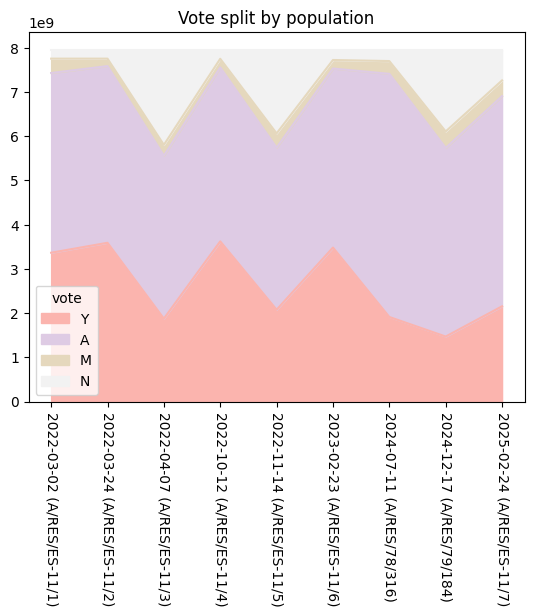

In [37]:
plt.figure(figsize=(12, 6))
ax = population_df.transpose().plot.area(colormap="Pastel1")
ax.tick_params(axis='x', labelrotation=270)
plt.title("Vote split by population")

In [38]:
GDP_df = create_summed_df('GDP 2023')  
GDP_df


,2022-03-02 (A/RES/ES-11/1),2022-03-24 (A/RES/ES-11/2),2022-04-07 (A/RES/ES-11/3),2022-10-12 (A/RES/ES-11/4),2022-11-14 (A/RES/ES-11/5),2023-02-23 (A/RES/ES-11/6),2024-07-11 (A/RES/78/316),2024-12-17 (A/RES/79/184),2025-02-24 (A/RES/ES-11/7)
vote,,,,,,,,,
Y,7.618437e+13,7.685597e+13,6.594200e+13,7.659429e+13,6.808707e+13,7.657406e+13,6.649451e+13,6.449803e+13,4.139836e+13
A,2.487207e+13,2.446844e+13,1.569629e+13,2.443613e+13,1.464117e+13,2.476075e+13,3.469478e+13,1.822895e+13,3.097571e+13
M,6.501578e+11,3.821805e+11,4.629653e+11,6.583454e+11,5.246332e+11,3.332993e+11,4.761697e+11,5.574285e+11,6.629884e+11
N,2.093279e+12,2.093279e+12,2.169862e+13,2.111108e+12,2.054700e+13,2.131770e+12,2.134412e+12,2.051546e+13,3.076282e+13


Text(0.5, 1.0, 'Vote by GDP')

<Figure size 1200x600 with 0 Axes>

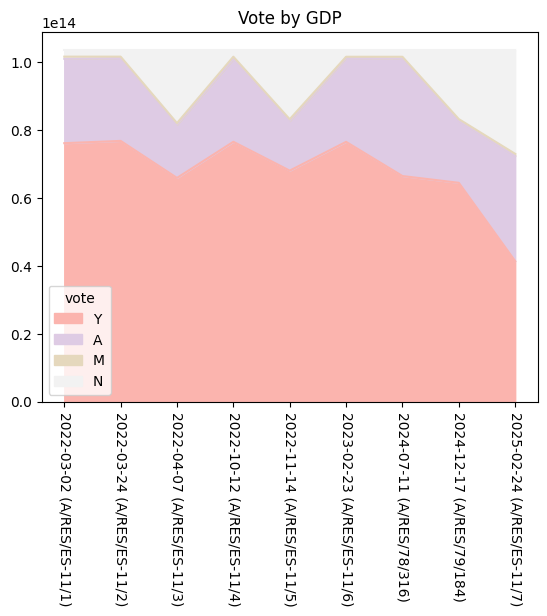

In [39]:
plt.figure(figsize=(12, 6))
ax = GDP_df.transpose().plot.area(colormap="Pastel1")
ax.tick_params(axis='x', labelrotation=270)
plt.title("Vote by GDP")

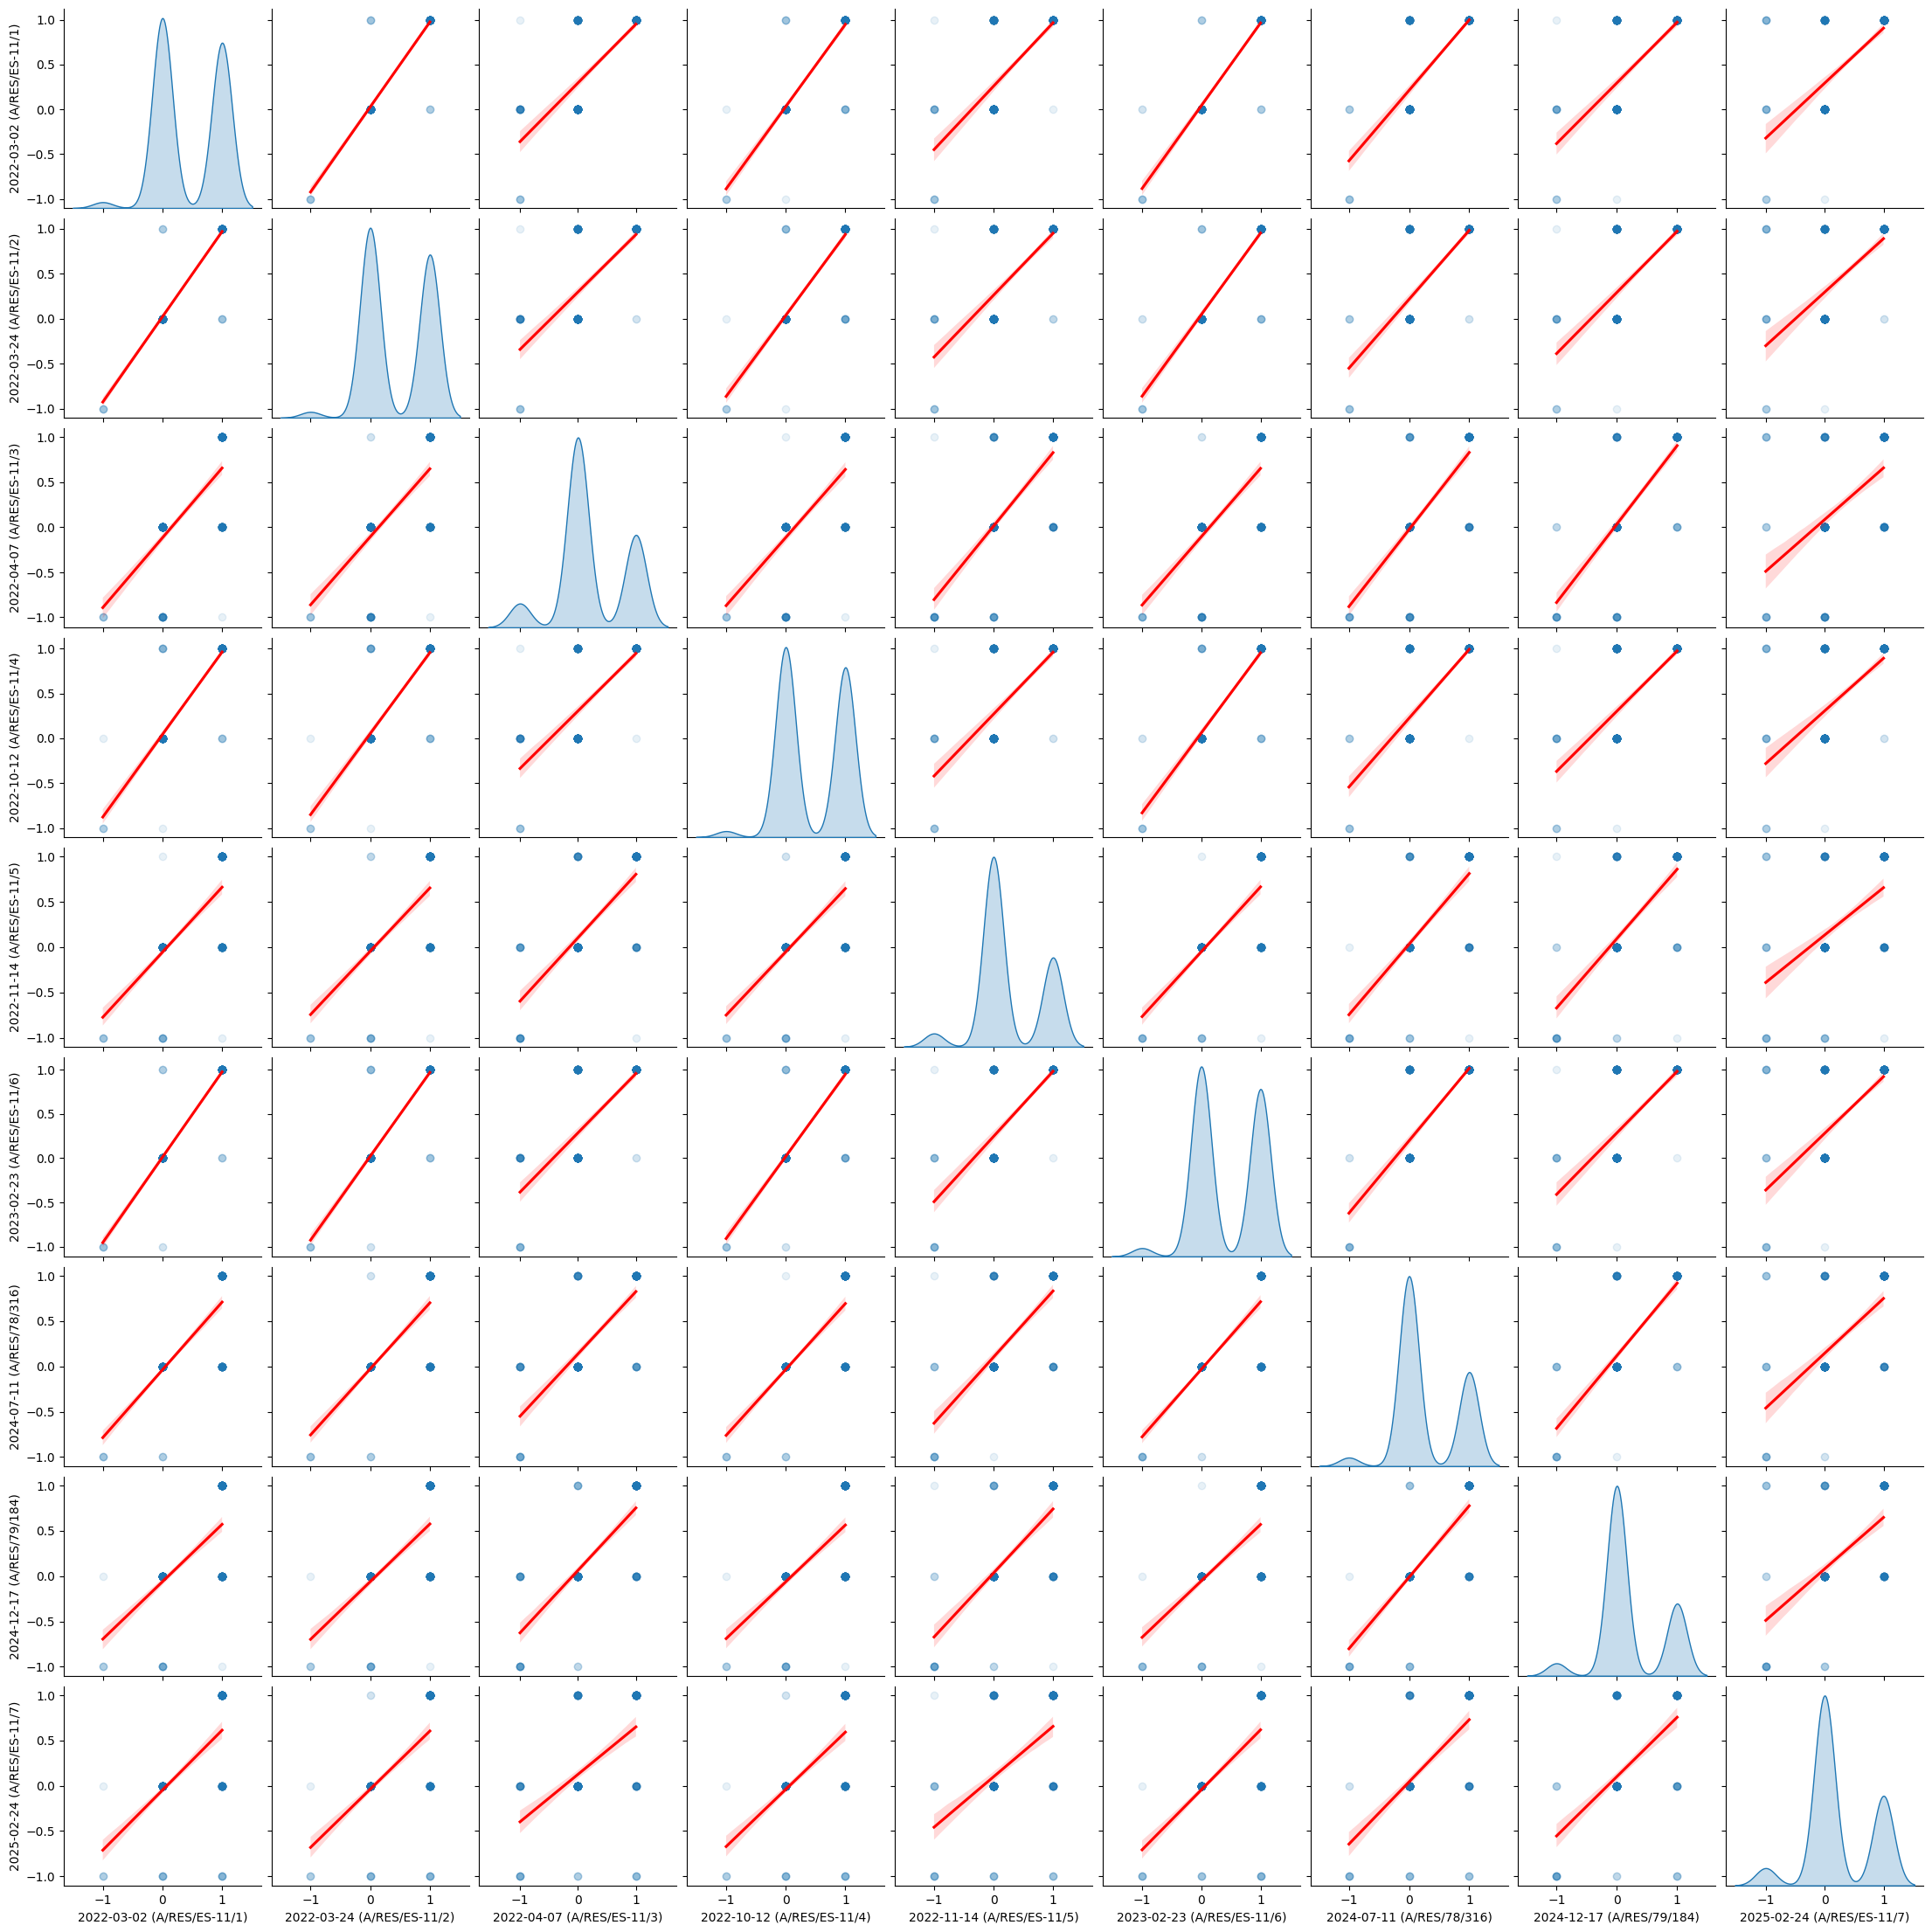

In [40]:



g = sns.pairplot(score_df[vote_headers], kind='reg', diag_kind="kde", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
#g.map_lower(sns.kdeplot, levels=4, color=".2")

#g.axes[0,0].set_xlim((-1.1,1.1))
#g.axes[0,1].set_xlim((-0.1,1.1))
#g.axes[0,2].set_xlim((-0.1,1.1))
#g.axes[0,3].set_xlim((-0.1,1.1))
#g.axes[0,4].set_xlim((-0.1,1.1))

#g.axes[0,0].set_ylim((-1.1,1.1))
#g.axes[1,0].set_ylim((-0.1,1.1))
#g.axes[2,0].set_ylim((-0.1,1.1))
#g.axes[3,0].set_ylim((-0.1,1.1))
#g.axes[4,0].set_ylim((-0.1,1.1))


In [41]:
pg.cronbach_alpha(data=score_df[vote_headers])


(0.9601515151515151, array([0.953, 0.967]))

In [42]:
score_df[vote_headers].corr()

,2022-03-02 (A/RES/ES-11/1),2022-03-24 (A/RES/ES-11/2),2022-04-07 (A/RES/ES-11/3),2022-10-12 (A/RES/ES-11/4),2022-11-14 (A/RES/ES-11/5),2023-02-23 (A/RES/ES-11/6),2024-07-11 (A/RES/78/316),2024-12-17 (A/RES/79/184),2025-02-24 (A/RES/ES-11/7)
2022-03-02 (A/RES/ES-11/1),1.000000,0.947625,0.712184,0.918736,0.712334,0.943358,0.766843,0.654499,0.637146
2022-03-24 (A/RES/ES-11/2),0.947625,1.000000,0.693659,0.901333,0.692718,0.926182,0.746985,0.657575,0.617903
2022-04-07 (A/RES/ES-11/3),0.712184,0.693659,1.000000,0.695791,0.755269,0.712298,0.766747,0.774494,0.548209
2022-10-12 (A/RES/ES-11/4),0.918736,0.901333,0.695791,1.000000,0.693893,0.909503,0.746977,0.648434,0.608508
2022-11-14 (A/RES/ES-11/5),0.712334,0.692718,0.755269,0.693893,1.000000,0.725756,0.753689,0.735455,0.539485
2023-02-23 (A/RES/ES-11/6),0.943358,0.926182,0.712298,0.909503,0.725756,1.000000,0.780818,0.657556,0.650942
2024-07-11 (A/RES/78/316),0.766843,0.746985,0.766747,0.746977,0.753689,0.780818,1.000000,0.794738,0.644319
2024-12-17 (A/RES/79/184),0.654499,0.657575,0.774494,0.648434,0.735455,0.657556,0.794738,1.000000,0.610049
2025-02-24 (A/RES/ES-11/7),0.637146,0.617903,0.548209,0.608508,0.539485,0.650942,0.644319,0.610049,1.000000


# Bürgenstock


In [43]:
def map_Burgenstock_words(row):
    if row['Present'] == "Afwezig" and row['Signed'] == 'no':
        return 'Absent and did not sign'
    elif row['Present'] == "Afwezig" and row['Signed'] == 'yes':
        return 'Absent but signed'
    elif row['Present'] == "Aanwezig" and row['Signed'] == 'no':
        return 'Present but did not sign'
    elif row['Present'] == "Aanwezig" and row['Signed'] == 'yes':
        return 'Present and signed'
    else:
        return 'Other'

def map_Burgenstock_values(row):
    if row['Present'] == "Afwezig" and row['Signed'] == 'no':
        return 0.0
    elif row['Present'] == "Afwezig" and row['Signed'] == 'yes':
        return 1.0
    elif row['Present'] == "Aanwezig" and row['Signed'] == 'no':
        return 0.5
    elif row['Present'] == "Aanwezig" and row['Signed'] == 'yes':
        return 1.0
    else:
        return 0.0
    
def read_burgenstock(filename, database, code_for_countries):
    df = pd.read_excel(filename, header=0)
    df['Burgenstock_words'] = df.apply(lambda x: map_Burgenstock_words(x), axis=1)
    df['Burgenstock'] = df.apply(lambda x: map_Burgenstock_values(x), axis=1)
    
    print(df['Burgenstock_words'].value_counts())
    return df.set_index('country_code')['Burgenstock']


filename = "Burgenstock.xlsx"
#read_burgenstock(filename, database, code_for_countries)
database = read_and_append_to_database(filename, read_burgenstock, database, code_for_countries)
database

Burgenstock_words
Absent and did not sign     89
Present and signed          76
Present but did not sign    16
Absent but signed           13
Name: count, dtype: int64


,Population size 2021,Population size 2023,GDP 2021,GDP 2023,FSI Total (2021),FSI C1: Security Apparatus (2021),FSI C2: Factionalized Elites (2021),FSI C3: Group Grievance (2021),FSI E1: Economy (2021),FSI E2: Economic Inequality (2021),...,2022-03-24 (A/RES/ES-11/2),2022-04-07 (A/RES/ES-11/3),2022-10-12 (A/RES/ES-11/4),2022-11-14 (A/RES/ES-11/5),2023-02-23 (A/RES/ES-11/6),2024-07-11 (A/RES/78/316),2024-12-17 (A/RES/79/184),2025-02-24 (A/RES/ES-11/7),UNGA score,Burgenstock
country_code,,,,,,,,,,,,,,,,,,,,,
AFG,40099462.0,42239854.0,1.426000e+10,1.723305e+10,102.1,10.0,8.6,7.2,9.2,8.1,...,Y,M,Y,Y,Y,M,M,M,0.555556,0.0
ALB,2811666.0,2745972.0,1.803201e+10,2.354718e+10,59.0,4.8,6.2,4.1,6.4,2.9,...,Y,Y,Y,Y,Y,Y,Y,Y,1.000000,1.0
DZA,44177969.0,45606480.0,1.862312e+11,2.476262e+11,73.6,6.0,7.5,7.2,6.8,5.6,...,A,N,A,A,A,A,A,A,-0.111111,0.0
AND,79034.0,80088.0,3.324648e+09,3.785067e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,Y,Y,Y,Y,Y,Y,Y,Y,1.000000,1.0
AGO,34503774.0,36684202.0,6.650513e+10,8.482465e+10,89.0,7.2,7.2,8.1,8.4,8.9,...,A,A,Y,A,A,A,A,A,0.111111,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
SCG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
SUN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN


# Humanitarian aid

In [44]:
def map_binary_hum_aid(aid):
    if math.isnan(aid):
        return 0.0
    else:
        return aid

def read_binary_aid(filename, database, code_for_countries):
    df = pd.read_excel(filename, header=0)
    df['country_code'] = df.apply(lambda x: find_country_code(string.capwords(x.Country), code_for_countries), axis=1)
    df['Humanitarian aid'] = df.apply(lambda x: map_binary_hum_aid(x['Humanitarian aid']), axis=1)
    
    # Drop the 'Country' column as we do not need it. 
    df = df.drop(['Country'], axis=1)
    
    print(df)
    return df.set_index('country_code')


filename = "HumAidWiki.xlsx"
database = read_and_append_to_database(filename, read_binary_aid, database, code_for_countries)
database


     Humanitarian aid country_code
0                 0.0          AFG
1                 1.0          ALB
2                 0.0          DZA
3                 0.0          AND
4                 0.0          AGO
..                ...          ...
188               0.0          VEN
189               1.0          VNM
190               0.0          YEM
191               0.0          ZMB
192               0.0          ZWE

[193 rows x 2 columns]


,Population size 2021,Population size 2023,GDP 2021,GDP 2023,FSI Total (2021),FSI C1: Security Apparatus (2021),FSI C2: Factionalized Elites (2021),FSI C3: Group Grievance (2021),FSI E1: Economy (2021),FSI E2: Economic Inequality (2021),...,2022-04-07 (A/RES/ES-11/3),2022-10-12 (A/RES/ES-11/4),2022-11-14 (A/RES/ES-11/5),2023-02-23 (A/RES/ES-11/6),2024-07-11 (A/RES/78/316),2024-12-17 (A/RES/79/184),2025-02-24 (A/RES/ES-11/7),UNGA score,Burgenstock,Humanitarian aid
country_code,,,,,,,,,,,,,,,,,,,,,
AFG,40099462.0,42239854.0,1.426000e+10,1.723305e+10,102.1,10.0,8.6,7.2,9.2,8.1,...,M,Y,Y,Y,M,M,M,0.555556,0.0,0.0
ALB,2811666.0,2745972.0,1.803201e+10,2.354718e+10,59.0,4.8,6.2,4.1,6.4,2.9,...,Y,Y,Y,Y,Y,Y,Y,1.000000,1.0,1.0
DZA,44177969.0,45606480.0,1.862312e+11,2.476262e+11,73.6,6.0,7.5,7.2,6.8,5.6,...,N,A,A,A,A,A,A,-0.111111,0.0,0.0
AND,79034.0,80088.0,3.324648e+09,3.785067e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,Y,Y,Y,Y,Y,Y,Y,1.000000,1.0,0.0
AGO,34503774.0,36684202.0,6.650513e+10,8.482465e+10,89.0,7.2,7.2,8.1,8.4,8.9,...,A,Y,A,A,A,A,A,0.111111,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
SCG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
SUN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN


In [45]:
def read_aid_UNOCHA(filename, database, code_for_countries):
    df = pd.read_excel(filename, header=0)
    df.fillna(0, inplace=True)
    df['country_code'] = df.apply(lambda x: find_country_code(string.capwords(x.Country), code_for_countries), axis=1)
    df = df.drop(['Country'], axis=1).set_index('country_code')
    
    df = df.mean(axis=1).rename('aid UNOCHA')
    
    
    print(df)
    return df

def scale_col(database, col):
    database[col] = (database[col]-database[col].min())/(database[col].max()-database[col].min())
    return database

    
filename = "UNOCHAUkraine.xlsx"
database = read_and_append_to_database(filename, read_aid_UNOCHA, database, code_for_countries)
database['aid UNOCHA'] = database['aid UNOCHA']/database['GDP 2023']
database = scale_col(database, 'aid UNOCHA')
database['aid UNOCHA'].fillna(0, inplace=True)

database


Error! Name Jersey not in country_dict
country_code
DEU       4.976255e+07
CAN       1.572717e+07
GBR       4.235287e+07
CHE       1.116863e+07
NLD       1.996353e+07
USA       2.233333e+07
FRA       8.930033e+06
NOR       1.622103e+07
AUS       8.153352e+06
DNK       6.444707e+06
BEL       7.939335e+06
FIN       7.369282e+06
SWE       4.422820e+06
ITA       2.190580e+06
ESP       2.217194e+06
JPN       1.654321e+06
IRL       3.688965e+06
KOR       4.383333e+06
NZL       2.346173e+06
LUX       5.230337e+05
ISL       6.611683e+05
LTU       1.671237e+05
SVN       7.301933e+04
EST       1.007930e+05
Jersey    5.354733e+04
CYP       3.683833e+04
PHL       3.333333e+04
BGR       4.597967e+04
POL       6.693027e+05
Name: aid UNOCHA, dtype: float64


/tmp/ipykernel_178468/1624490476.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  database['aid UNOCHA'].fillna(0, inplace=True)


,Population size 2021,Population size 2023,GDP 2021,GDP 2023,FSI Total (2021),FSI C1: Security Apparatus (2021),FSI C2: Factionalized Elites (2021),FSI C3: Group Grievance (2021),FSI E1: Economy (2021),FSI E2: Economic Inequality (2021),...,2022-10-12 (A/RES/ES-11/4),2022-11-14 (A/RES/ES-11/5),2023-02-23 (A/RES/ES-11/6),2024-07-11 (A/RES/78/316),2024-12-17 (A/RES/79/184),2025-02-24 (A/RES/ES-11/7),UNGA score,Burgenstock,Humanitarian aid,aid UNOCHA
country_code,,,,,,,,,,,,,,,,,,,,,
AFG,40099462.0,42239854.0,1.426000e+10,1.723305e+10,102.1,10.0,8.6,7.2,9.2,8.1,...,Y,Y,Y,M,M,M,0.555556,0.0,0.0,0.0
ALB,2811666.0,2745972.0,1.803201e+10,2.354718e+10,59.0,4.8,6.2,4.1,6.4,2.9,...,Y,Y,Y,Y,Y,Y,1.000000,1.0,1.0,0.0
DZA,44177969.0,45606480.0,1.862312e+11,2.476262e+11,73.6,6.0,7.5,7.2,6.8,5.6,...,A,A,A,A,A,A,-0.111111,0.0,0.0,0.0
AND,79034.0,80088.0,3.324648e+09,3.785067e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,Y,Y,Y,Y,Y,Y,1.000000,1.0,0.0,0.0
AGO,34503774.0,36684202.0,6.650513e+10,8.482465e+10,89.0,7.2,7.2,8.1,8.4,8.9,...,Y,A,A,A,A,A,0.111111,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SCG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.0
SUN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.0
YMD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.0


In [46]:
database['aid to Ukraine'] = (database['aid UNOCHA'] + database['Humanitarian aid'])/2
database

,Population size 2021,Population size 2023,GDP 2021,GDP 2023,FSI Total (2021),FSI C1: Security Apparatus (2021),FSI C2: Factionalized Elites (2021),FSI C3: Group Grievance (2021),FSI E1: Economy (2021),FSI E2: Economic Inequality (2021),...,2022-11-14 (A/RES/ES-11/5),2023-02-23 (A/RES/ES-11/6),2024-07-11 (A/RES/78/316),2024-12-17 (A/RES/79/184),2025-02-24 (A/RES/ES-11/7),UNGA score,Burgenstock,Humanitarian aid,aid UNOCHA,aid to Ukraine
country_code,,,,,,,,,,,,,,,,,,,,,
AFG,40099462.0,42239854.0,1.426000e+10,1.723305e+10,102.1,10.0,8.6,7.2,9.2,8.1,...,Y,Y,M,M,M,0.555556,0.0,0.0,0.0,0.0
ALB,2811666.0,2745972.0,1.803201e+10,2.354718e+10,59.0,4.8,6.2,4.1,6.4,2.9,...,Y,Y,Y,Y,Y,1.000000,1.0,1.0,0.0,0.5
DZA,44177969.0,45606480.0,1.862312e+11,2.476262e+11,73.6,6.0,7.5,7.2,6.8,5.6,...,A,A,A,A,A,-0.111111,0.0,0.0,0.0,0.0
AND,79034.0,80088.0,3.324648e+09,3.785067e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,Y,Y,Y,Y,Y,1.000000,1.0,0.0,0.0,0.0
AGO,34503774.0,36684202.0,6.650513e+10,8.482465e+10,89.0,7.2,7.2,8.1,8.4,8.9,...,A,A,A,A,A,0.111111,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SCG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.0,NaN
SUN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.0,NaN
YMD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.0,NaN


# Arms supplies

In [47]:
def read_arms_Ukraine(filename, database, code_for_countries):
    df = pd.read_excel(filename, header=0)
    print(df)
    df['country_code'] = df.apply(lambda x: find_country_code(x.Supplier, code_for_countries), axis=1)
    
    df = df['country_code'].value_counts(sort=False).rename('arms supplied count')
    
    print(df)
    return df


filename = "SIPRIUkraine20222025.xlsx"
read_arms_Ukraine(filename, database, code_for_countries)
database = read_and_append_to_database(filename, read_arms_Ukraine, database, code_for_countries)
#database['arms supplied'] = database['arms supplied']/database['GDP 2023']
database = scale_diminishing(database, 'arms supplied count', 'arms supplied')
database['arms supplied'].fillna(0, inplace=True)

database

    Recipient             Supplier             Designation  \
0     Ukraine              Belgium           M-109A1 155mm   
1     Ukraine               Poland             Leopard-2A4   
2     Ukraine              Czechia             BM-21 122mm   
3     Ukraine        United States             Penguin UAV   
4     Ukraine              Czechia                  T-72M1   
..        ...                  ...                     ...   
405   Ukraine  unknown supplier(s)  vehicle engine 301-400   
406   Ukraine               Jordan          APC-79 Fighter   
407   Ukraine        United States                     MMR   
408   Ukraine       United Kingdom             LMM Martlet   
409   Ukraine       United Kingdom          Starstreak FIX   

                    Description    Weapon Category  Order Year  \
0            self-propelled gun          Artillery        2022   
1                          tank  Armoured vehicles        2022   
2      multiple rocket launcher          Artillery       

/tmp/ipykernel_178468/636938873.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  database['arms supplied'].fillna(0, inplace=True)


,Population size 2021,Population size 2023,GDP 2021,GDP 2023,FSI Total (2021),FSI C1: Security Apparatus (2021),FSI C2: Factionalized Elites (2021),FSI C3: Group Grievance (2021),FSI E1: Economy (2021),FSI E2: Economic Inequality (2021),...,2024-07-11 (A/RES/78/316),2024-12-17 (A/RES/79/184),2025-02-24 (A/RES/ES-11/7),UNGA score,Burgenstock,Humanitarian aid,aid UNOCHA,aid to Ukraine,arms supplied count,arms supplied
country_code,,,,,,,,,,,,,,,,,,,,,
AFG,40099462.0,42239854.0,1.426000e+10,1.723305e+10,102.1,10.0,8.6,7.2,9.2,8.1,...,M,M,M,0.555556,0.0,0.0,0.0,0.0,NaN,0.000000
ALB,2811666.0,2745972.0,1.803201e+10,2.354718e+10,59.0,4.8,6.2,4.1,6.4,2.9,...,Y,Y,Y,1.000000,1.0,1.0,0.0,0.5,NaN,0.000000
DZA,44177969.0,45606480.0,1.862312e+11,2.476262e+11,73.6,6.0,7.5,7.2,6.8,5.6,...,A,A,A,-0.111111,0.0,0.0,0.0,0.0,NaN,0.000000
AND,79034.0,80088.0,3.324648e+09,3.785067e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,Y,Y,Y,1.000000,1.0,0.0,0.0,0.0,NaN,0.000000
AGO,34503774.0,36684202.0,6.650513e+10,8.482465e+10,89.0,7.2,7.2,8.1,8.4,8.9,...,A,A,A,0.111111,0.0,0.0,0.0,0.0,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,0.000000
YMD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,0.000000
YUG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,0.000000


In [48]:
for it in database['arms supplied']:
    print(it)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.9122085048010974
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.9948617689138274
0.0
0.0
0.0
0.0
0.33333333333333337
0.0
0.0
0.0
0.5555555555555556
0.0
0.0
0.0
0.0
0.0
0.992292653370741
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.9414723365340649
0.0
0.0
0.9999405968079365
0.868312757201646
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.9414723365340649
0.0
0.0
0.0
0.868312757201646
0.999866342817857
0.0
0.0
0.0
0.9999997965151146
0.0
0.5555555555555556
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.9948617689138274
0.0
0.0
0.5555555555555556
0.0
0.0
0.0
0.0
0.0
0.0
0.9414723365340649
0.0
0.0
0.0
0.0
0.0
0.9122085048010974
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.33333333333333337
0.33333333333333337
0.0
0.0
0.0
0.0
0.0
0.9977163417394789
0.0
0.0
0.0
0.0
0.0
0.7037037037037037
0.9977163417394789
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.9999823990542034
0.868312757201646
0.5555555555555556
0.8024691358024691
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


[Text(0.5, 0, 'Arms supplied'),
 Text(0, 0.5, 'Number of countries'),
 Text(0.5, 1.0, 'Distribution of arms supplies')]

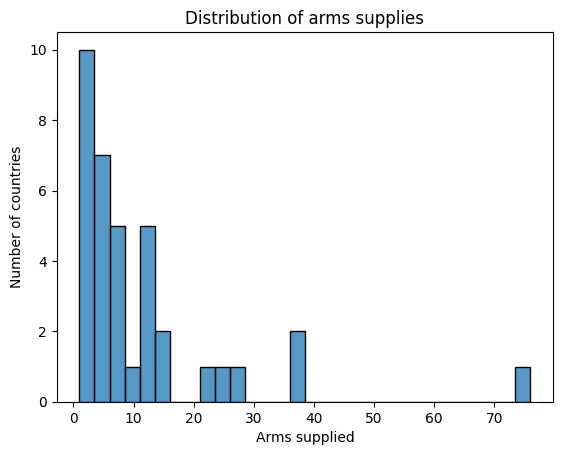

In [49]:
arms_df = database[database['arms supplied count']>0.0]
#print(arms_df)
#arms_df = np.log2(arms_df['arms supplied'])

ax = sns.histplot(data=arms_df, x="arms supplied count", bins=30)
ax.set(xlabel='Arms supplied',
       ylabel='Number of countries',
       title='Distribution of arms supplies')



In [50]:
database[database['arms supplied']>0.0]

,Population size 2021,Population size 2023,GDP 2021,GDP 2023,FSI Total (2021),FSI C1: Security Apparatus (2021),FSI C2: Factionalized Elites (2021),FSI C3: Group Grievance (2021),FSI E1: Economy (2021),FSI E2: Economic Inequality (2021),...,2024-07-11 (A/RES/78/316),2024-12-17 (A/RES/79/184),2025-02-24 (A/RES/ES-11/7),UNGA score,Burgenstock,Humanitarian aid,aid UNOCHA,aid to Ukraine,arms supplied count,arms supplied
country_code,,,,,,,,,,,,,,,,,,,,,
AUS,25685412.0,26638544.0,1.556736e+12,1.728057e+12,21.8,2.7,1.7,3.1,1.6,1.8,...,Y,Y,Y,1.000000,1.0,1.0,0.139199,0.569599,6.0,0.912209
BEL,11586195.0,11822592.0,5.984940e+11,6.447828e+11,31.0,2.6,4.4,4.1,4.6,2.1,...,Y,Y,Y,1.000000,1.0,1.0,0.366950,0.683475,13.0,0.994862
BIH,3270943.0,3210847.0,2.367271e+10,2.751478e+10,72.9,5.0,8.7,6.6,6.4,4.1,...,Y,Y,Y,1.000000,1.0,1.0,0.000000,0.500000,1.0,0.333333
BGR,6877743.0,6430370.0,8.441795e+10,1.024077e+11,51.6,4.3,5.3,4.2,5.2,3.8,...,Y,Y,Y,1.000000,1.0,1.0,0.011177,0.505589,2.0,0.555556
CAN,38239864.0,40097761.0,2.007472e+12,2.142471e+12,21.7,2.8,2.5,2.2,2.0,2.3,...,Y,Y,Y,1.000000,1.0,1.0,0.217838,0.608919,12.0,0.992293
HRV,3878981.0,3853200.0,6.900680e+10,8.439380e+10,49.8,2.6,4.4,4.9,5.7,2.8,...,Y,Y,Y,1.000000,1.0,1.0,0.000000,0.500000,7.0,0.941472
CZE,10505772.0,10873689.0,2.909727e+11,3.432079e+11,39.3,2.6,5.3,4.6,4.2,2.0,...,Y,Y,Y,1.000000,1.0,1.0,0.000000,0.500000,24.0,0.999941
DNK,5856733.0,5946952.0,4.083782e+11,4.070919e+11,18.8,1.7,1.4,3.7,1.7,1.2,...,Y,Y,Y,1.000000,1.0,1.0,0.472441,0.736220,5.0,0.868313
EST,1330932.0,1366188.0,3.720456e+10,4.129125e+10,39.5,2.3,5.9,7.4,3.2,2.6,...,Y,Y,Y,1.000000,1.0,1.0,0.070913,0.535456,7.0,0.941472


# Compare variables

In [51]:
compare_list = ['UNGA score', 'Burgenstock', 'Humanitarian aid', 'arms supplied']


(-0.1, 1.1)

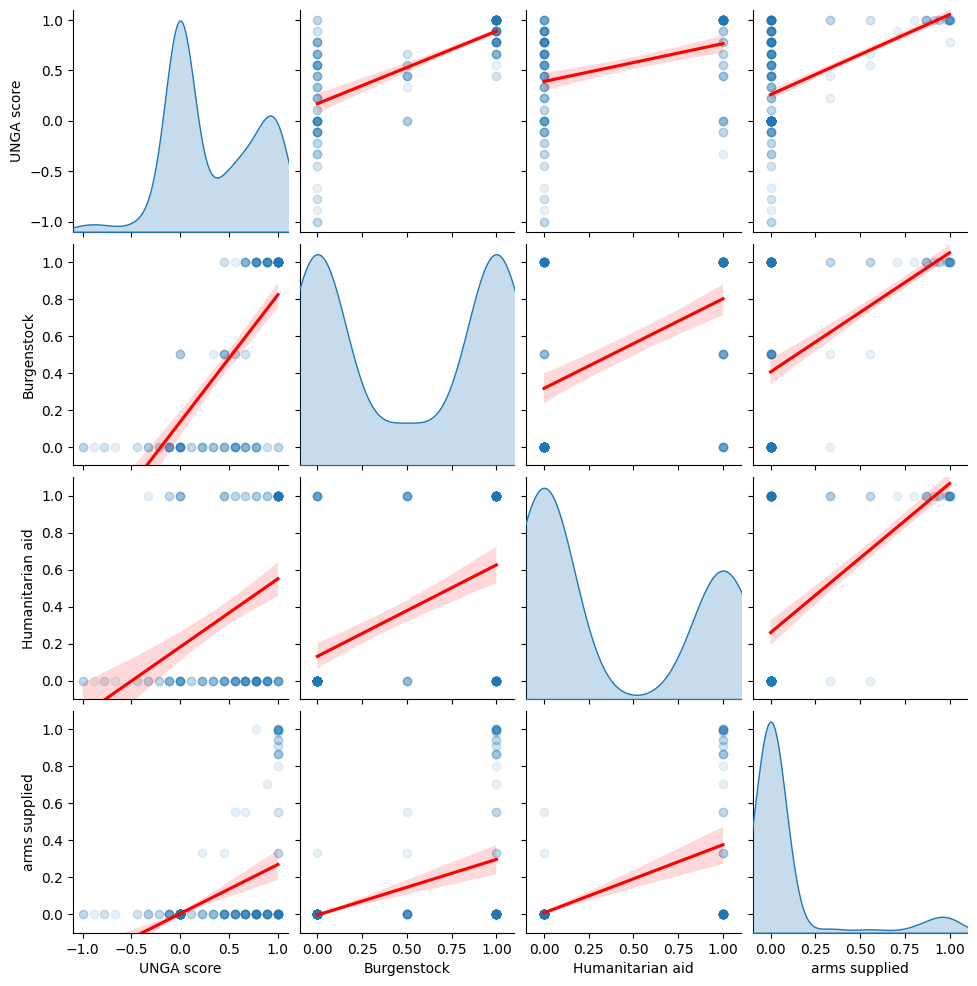

In [52]:

g = sns.pairplot(database[compare_list], kind='reg', diag_kind="kde", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
#g.map_lower(sns.kdeplot, levels=4, color=".2")

g.axes[0,0].set_xlim((-1.1,1.1))
g.axes[0,1].set_xlim((-0.1,1.1)) #Burgenstock
g.axes[0,2].set_xlim((-0.1,1.1)) #Hum aid
g.axes[0,3].set_xlim((-0.1,1.1))

g.axes[0,0].set_ylim((-1.1,1.1))
g.axes[1,0].set_ylim((-0.1,1.1))
g.axes[2,0].set_ylim((-0.1,1.1))
g.axes[3,0].set_ylim((-0.1,1.1))


In [53]:
pg.cronbach_alpha(data=database[compare_list])


(0.8082663067063609, array([0.771, 0.841]))

In [54]:
database[compare_list].corr()

,UNGA score,Burgenstock,Humanitarian aid,arms supplied
UNGA score,1.000000,0.703038,0.372169,0.459241
Burgenstock,0.703038,1.000000,0.489519,0.440287
Humanitarian aid,0.372169,0.489519,1.000000,0.544952
arms supplied,0.459241,0.440287,0.544952,1.000000


In [55]:
print(database[compare_list].corr().to_latex(float_format="%.2f"))

\begin{tabular}{lrrrr}
\toprule
 & UNGA score & Burgenstock & Humanitarian aid & arms supplied \\
\midrule
UNGA score & 1.00 & 0.70 & 0.37 & 0.46 \\
Burgenstock & 0.70 & 1.00 & 0.49 & 0.44 \\
Humanitarian aid & 0.37 & 0.49 & 1.00 & 0.54 \\
arms supplied & 0.46 & 0.44 & 0.54 & 1.00 \\
\bottomrule
\end{tabular}



# Save database

In [56]:
database.to_csv('database.csv')

# Combined position variable

In [57]:
database['state position'] = database[compare_list].sum(axis=1)
database[compare_list]

,UNGA score,Burgenstock,Humanitarian aid,arms supplied
country_code,,,,
AFG,0.555556,0.0,0.0,0.000000
ALB,1.000000,1.0,1.0,0.000000
DZA,-0.111111,0.0,0.0,0.000000
AND,1.000000,1.0,0.0,0.000000
AGO,0.111111,0.0,0.0,0.000000
...,...,...,...,...
SUN,0.000000,NaN,NaN,0.000000
YMD,0.000000,NaN,NaN,0.000000
YUG,0.000000,NaN,NaN,0.000000


In [58]:
database['state position']

country_code
AFG                    0.555556
ALB                    3.000000
DZA                   -0.111111
AND                    2.000000
AGO                    0.111111
                         ...   
SUN                    0.000000
YMD                    0.000000
YUG                    0.000000
Jersey                 0.000000
unknown supplier(s)    0.802469
Name: state position, Length: 310, dtype: float64

[Text(0.5, 0, 'State position'),
 Text(0, 0.5, 'Number of countries'),
 Text(0.5, 1.0, 'State positions')]

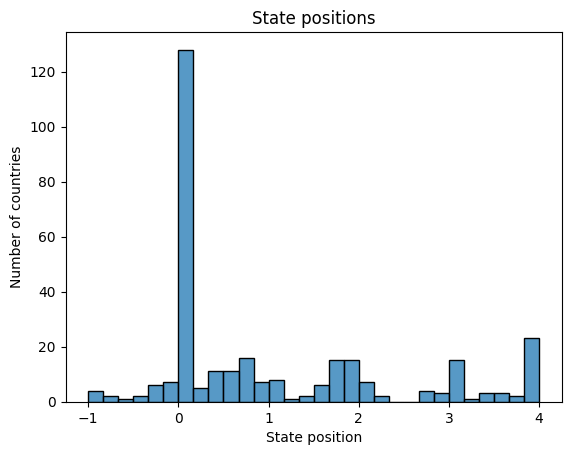

In [59]:
ax = sns.histplot(data=database, x='state position', bins=30)
ax.set(xlabel='State position',
       ylabel='Number of countries',
       title='State positions')

# Preparation for regression analysis

In [60]:
#indep_variables = ['Former Soviet Union', 'Democracy Index', 'EU', 'NAVO', 'SCO', 'Import from Russia', 'Import from Ukraine']
indep_variables = ['Former Soviet Union', 'Confirmed Russian PMC operations', 'Democracy Index', 'Import from Russia', 'Import from EU', 'EU aid', 'US aid', 'Arms received from Russia', 'UKR voting similarity', 'RUS voting similarity', 'USA voting similarity', 'EU voting similarity', 'total voting similarity']

dep_var = ['state position']

In [61]:
filtered_database = database[indep_variables + dep_var].dropna()
filtered_database

,Former Soviet Union,Confirmed Russian PMC operations,Democracy Index,Import from Russia,Import from EU,EU aid,US aid,Arms received from Russia,UKR voting similarity,RUS voting similarity,USA voting similarity,EU voting similarity,total voting similarity,state position
country_code,,,,,,,,,,,,,,
ALB,1.0,0.0,3.72,0.018779,0.537741,0.020084,0.003573,0.000000,0.101810,0.308258,0.458993,0.045249,0.298925,3.000000
AGO,1.0,0.0,5.82,0.016253,0.329169,0.001589,0.002525,0.703704,0.296097,0.218043,0.721719,0.318156,0.100679,0.111111
ARG,1.0,0.0,3.38,0.010299,0.147367,0.000129,0.000028,0.333333,0.213801,0.188914,0.697115,0.228507,0.059672,2.888889
ARM,1.0,0.0,4.58,0.335278,0.173858,0.009600,0.010144,0.994862,0.204186,0.160068,0.677319,0.218891,0.145645,1.500000
AUS,1.0,0.0,1.34,0.001457,0.156845,0.000000,0.000000,0.000000,0.173360,0.395079,0.382919,0.139989,0.367647,3.912209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
URY,1.0,0.0,1.34,0.009665,0.124773,0.000000,0.000040,0.000000,0.240102,0.214084,0.726810,0.262161,0.040724,2.000000
UZB,1.0,0.0,7.88,0.224001,0.135489,0.001259,0.002206,0.802469,0.317025,0.204468,0.684955,0.335690,0.179299,0.888889
VNM,1.0,0.0,7.38,0.006966,0.051027,0.001238,0.001844,0.988439,0.309955,0.176471,0.786482,0.346154,0.076640,0.888889


In [62]:
# Remove Russia and Ukraine
filtered_database = filtered_database.drop(['UKR'],axis=0) #['RUS'] no longer needs to be filtered?
filtered_database

,Former Soviet Union,Confirmed Russian PMC operations,Democracy Index,Import from Russia,Import from EU,EU aid,US aid,Arms received from Russia,UKR voting similarity,RUS voting similarity,USA voting similarity,EU voting similarity,total voting similarity,state position
country_code,,,,,,,,,,,,,,
ALB,1.0,0.0,3.72,0.018779,0.537741,0.020084,0.003573,0.000000,0.101810,0.308258,0.458993,0.045249,0.298925,3.000000
AGO,1.0,0.0,5.82,0.016253,0.329169,0.001589,0.002525,0.703704,0.296097,0.218043,0.721719,0.318156,0.100679,0.111111
ARG,1.0,0.0,3.38,0.010299,0.147367,0.000129,0.000028,0.333333,0.213801,0.188914,0.697115,0.228507,0.059672,2.888889
ARM,1.0,0.0,4.58,0.335278,0.173858,0.009600,0.010144,0.994862,0.204186,0.160068,0.677319,0.218891,0.145645,1.500000
AUS,1.0,0.0,1.34,0.001457,0.156845,0.000000,0.000000,0.000000,0.173360,0.395079,0.382919,0.139989,0.367647,3.912209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
URY,1.0,0.0,1.34,0.009665,0.124773,0.000000,0.000040,0.000000,0.240102,0.214084,0.726810,0.262161,0.040724,2.000000
UZB,1.0,0.0,7.88,0.224001,0.135489,0.001259,0.002206,0.802469,0.317025,0.204468,0.684955,0.335690,0.179299,0.888889
VNM,1.0,0.0,7.38,0.006966,0.051027,0.001238,0.001844,0.988439,0.309955,0.176471,0.786482,0.346154,0.076640,0.888889


# Regression

In [63]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [64]:
model = LinearRegression().fit(filtered_database[indep_variables], filtered_database[dep_var])

In [65]:
r_sq = model.score(filtered_database[indep_variables], filtered_database[dep_var])
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {model.intercept_}")

print(f"coefficients: {model.coef_}")


coefficient of determination: 0.7884612998086444
intercept: [2.14846385]
coefficients: [[  0.          -0.50957166  -0.14012306  -1.18107411  -0.40385717
   -4.58095718  -5.2700921    0.27271613   5.71598791   6.29000508
    0.44463749 -11.21488916  -0.23981943]]


In [66]:
# https://realpython.com/linear-regression-in-python/

x = np.array(filtered_database[indep_variables])
x = sm.add_constant(x)
x

array([[1.        , 0.        , 3.72      , ..., 0.45899321, 0.04524887,
        0.29892534],
       [1.        , 0.        , 5.82      , ..., 0.72171946, 0.31815611,
        0.10067873],
       [1.        , 0.        , 3.38      , ..., 0.69711538, 0.22850679,
        0.05967195],
       ...,
       [1.        , 0.        , 7.38      , ..., 0.7864819 , 0.34615385,
        0.07664027],
       [1.        , 0.        , 4.2       , ..., 0.75169683, 0.3074095 ,
        0.05656109],
       [1.        , 0.        , 6.96      , ..., 0.7861991 , 0.3594457 ,
        0.11595023]])

In [67]:
y = np.array(filtered_database[dep_var])

In [68]:
model = sm.OLS(y, x)

In [69]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     39.14
Date:                Sun, 08 Jun 2025   Prob (F-statistic):           1.02e-36
Time:                        23:06:09   Log-Likelihood:                -139.22
No. Observations:                 139   AIC:                             304.4
Df Residuals:                     126   BIC:                             342.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1485      1.446      1.486      0.1

# Todo

- Filter out more countries for the religious composition, esp. countries with very low inhabitant counts? 
